In [1]:
!nvidia-smi

Tue Oct 29 08:28:09 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   55C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
!pip install nltk

In [3]:
!pip install scikit-learn


In [4]:
!pip install --upgrade pip setuptools wheel


In [5]:
import nltk
import matplotlib.pyplot as plt
from collections import Counter
import string
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [6]:
# Function to load Bangla text from a file
def load_ai_written_text(file_path):
    with open('/content/Jadukor-AI.txt', 'r', encoding='utf-8') as file:
        return file.read()

# Path to the text file
file_path = '/content/Jadukor-AI.txt'

# Load the text from the file and store it in the 'text' variable
ai_written_text = load_ai_written_text(file_path)

# Print the text to verify
print(ai_written_text)

মেঘলা দুপুর। শ্রাবণ মাসের মৃদু বৃষ্টির ফোঁটাগুলো জানালার কাঁচ বেয়ে গড়িয়ে পড়ছে। ঘরের মধ্যে একটা গুমোট চাপা পরিবেশ। টেবিলের ওপর ছড়িয়ে থাকা বইগুলোর দিকে তাকিয়ে রাকিবের চোখ ভারী হয়ে আসছে। তার পরীক্ষার খাতাটা টেবিলের ওপর উল্টো করে রাখা, যেন চোখের সামনে থাকলেও সেটা থেকে পালানোর চেষ্টা করছে। খাতার ওপর লাল কালির ক্রস চিহ্ন যেন তার বুকের ওপর বিশাল ভারী পাথর হয়ে বসে আছে।
রাকিব এ বছরও অংকে ফেল করেছে। এটা নিয়ে চতুর্থবার। আগেরবার যখন ফেল করেছিল, তখন বাবা-মা তার সাথে কড়া গলায় কথা বলেছিলেন। "তুমি ভালোভাবে পড়াশোনা করো না, এজন্যই এসব হচ্ছে," মা বলেছিলেন রাগে। বাবা নিরবে শুধু কাগজগুলো হাতে নিয়েছিলেন, কিন্তু তার চোখের গভীর দৃষ্টি রাকিবের ভেতরটা কাঁপিয়ে দিয়েছিল।
আজও মা-বাবা বাসায় ফিরবেন। পরীক্ষার ফলাফল তারা এখনো জানেন না, কিন্তু জানবেন যখন জানবেন, তখন কী হবে—এই ভেবে রাকিবের গলা শুকিয়ে আসছে। মনে হচ্ছে যেন শ্বাস নেওয়াও কঠিন হয়ে উঠেছে। সারা দুপুর জুড়ে সে বিছানায় শুয়ে শুয়ে নিজেকে প্রশ্ন করেছে—"আমি কি সত্যিই এতোটা অক্ষম?"
হঠাৎ করেই জানালার বাইরে একটা অদ্ভুত শব্দ হলো। রাকিব জানালার দিকে তাকালো। কুয়াশা ভেদ করে ক

In [7]:
def bangla_sentence_tokenize(ai_written_text):
    # Split sentences by full stop (।) used in Bangla
    sentences = ai_written_text.split('।')
    sentences = ai_written_text.split('\n\n')
    sentences = ai_written_text.split('\n')
    return [sentence.strip() for sentence in sentences if sentence.strip()]

In [8]:
def bangla_word_tokenize(ai_written_text):
    # Split words by spaces
    words = ai_written_text.split()

    # Remove any leading/trailing whitespace and filter out empty strings
    words = [word.strip() for word in words if word.strip()]

    # Print the total number of words
    total_words = len(words)
    print(f"Total number of words: {total_words}")

    return words, total_words  # Also returning the total number of words


In [9]:
def preprocess_text(ai_written_text):
    # Remove punctuation (you might want to keep Bangla-specific punctuation like "।")
    translator = str.maketrans('', '', string.punctuation)
    ai_written_text = ai_written_text.translate(translator)

    # Tokenize sentences using the custom function
    sentences = bangla_sentence_tokenize(ai_written_text)

    # Tokenize words using the custom function
    words, total_words = bangla_word_tokenize(ai_written_text) # Modified to correctly capture the two return values

    return words, total_words, sentences # Added total_words to the return statement


words, total_words, sentences = preprocess_text(ai_written_text)
print(words)
print(total_words)
print(sentences)

Total number of words: 1595
['মেঘলা', 'দুপুর।', 'শ্রাবণ', 'মাসের', 'মৃদু', 'বৃষ্টির', 'ফোঁটাগুলো', 'জানালার', 'কাঁচ', 'বেয়ে', 'গড়িয়ে', 'পড়ছে।', 'ঘরের', 'মধ্যে', 'একটা', 'গুমোট', 'চাপা', 'পরিবেশ।', 'টেবিলের', 'ওপর', 'ছড়িয়ে', 'থাকা', 'বইগুলোর', 'দিকে', 'তাকিয়ে', 'রাকিবের', 'চোখ', 'ভারী', 'হয়ে', 'আসছে।', 'তার', 'পরীক্ষার', 'খাতাটা', 'টেবিলের', 'ওপর', 'উল্টো', 'করে', 'রাখা', 'যেন', 'চোখের', 'সামনে', 'থাকলেও', 'সেটা', 'থেকে', 'পালানোর', 'চেষ্টা', 'করছে।', 'খাতার', 'ওপর', 'লাল', 'কালির', 'ক্রস', 'চিহ্ন', 'যেন', 'তার', 'বুকের', 'ওপর', 'বিশাল', 'ভারী', 'পাথর', 'হয়ে', 'বসে', 'আছে।', 'রাকিব', 'এ', 'বছরও', 'অংকে', 'ফেল', 'করেছে।', 'এটা', 'নিয়ে', 'চতুর্থবার।', 'আগেরবার', 'যখন', 'ফেল', 'করেছিল', 'তখন', 'বাবামা', 'তার', 'সাথে', 'কড়া', 'গলায়', 'কথা', 'বলেছিলেন।', 'তুমি', 'ভালোভাবে', 'পড়াশোনা', 'করো', 'না', 'এজন্যই', 'এসব', 'হচ্ছে', 'মা', 'বলেছিলেন', 'রাগে।', 'বাবা', 'নিরবে', 'শুধু', 'কাগজগুলো', 'হাতে', 'নিয়েছিলেন', 'কিন্তু', 'তার', 'চোখের', 'গভীর', 'দৃষ্টি', 'রাকিবের', 'ভেতরটা', 'কাঁপিয়ে', 'দিয়েছিল।'

In [10]:
# Function to load Bangla text from a file
def load_ai_written_text(file_path):
    with open('/content/Jadukor-AI.txt', 'r', encoding='utf-8') as file:
        return file.read()

# Path to the text file
file_path = '/content/Jadukor-AI.txt'

# Load the text from the file and store it in the 'text' variable
ai_written_text = load_ai_written_text(file_path)

# Print the text to verify
print(ai_written_text)

মেঘলা দুপুর। শ্রাবণ মাসের মৃদু বৃষ্টির ফোঁটাগুলো জানালার কাঁচ বেয়ে গড়িয়ে পড়ছে। ঘরের মধ্যে একটা গুমোট চাপা পরিবেশ। টেবিলের ওপর ছড়িয়ে থাকা বইগুলোর দিকে তাকিয়ে রাকিবের চোখ ভারী হয়ে আসছে। তার পরীক্ষার খাতাটা টেবিলের ওপর উল্টো করে রাখা, যেন চোখের সামনে থাকলেও সেটা থেকে পালানোর চেষ্টা করছে। খাতার ওপর লাল কালির ক্রস চিহ্ন যেন তার বুকের ওপর বিশাল ভারী পাথর হয়ে বসে আছে।
রাকিব এ বছরও অংকে ফেল করেছে। এটা নিয়ে চতুর্থবার। আগেরবার যখন ফেল করেছিল, তখন বাবা-মা তার সাথে কড়া গলায় কথা বলেছিলেন। "তুমি ভালোভাবে পড়াশোনা করো না, এজন্যই এসব হচ্ছে," মা বলেছিলেন রাগে। বাবা নিরবে শুধু কাগজগুলো হাতে নিয়েছিলেন, কিন্তু তার চোখের গভীর দৃষ্টি রাকিবের ভেতরটা কাঁপিয়ে দিয়েছিল।
আজও মা-বাবা বাসায় ফিরবেন। পরীক্ষার ফলাফল তারা এখনো জানেন না, কিন্তু জানবেন যখন জানবেন, তখন কী হবে—এই ভেবে রাকিবের গলা শুকিয়ে আসছে। মনে হচ্ছে যেন শ্বাস নেওয়াও কঠিন হয়ে উঠেছে। সারা দুপুর জুড়ে সে বিছানায় শুয়ে শুয়ে নিজেকে প্রশ্ন করেছে—"আমি কি সত্যিই এতোটা অক্ষম?"
হঠাৎ করেই জানালার বাইরে একটা অদ্ভুত শব্দ হলো। রাকিব জানালার দিকে তাকালো। কুয়াশা ভেদ করে ক

In [11]:
!pip install BnLemma

In [12]:
import BnLemma as lm
import string

# Define a list of Bangla stop words (you can extend this list as needed)
bangla_stop_words = ['এ', 'ও', 'আছে', 'থেকে', 'কিন্তু', 'যা', 'যে', 'এবং', 'এই', 'ওই', 'হয়', 'সে', 'আমি', 'আমরা', 'তুমি', 'তারা']

# Function to tokenize and lemmatize Bangla sentences
def bangla_sentence_tokenize(ai_written_text):
    # Initialize the BnLemma lemmatizer
    bl = lm.Lemmatizer()

    # Split sentences by full stop (।) and newline characters
    sentences = ai_written_text.split('।')
    sentences = [sentence for sublist in [s.split('\n\n') for s in sentences] for sentence in sublist]
    sentences = [sentence for sublist in [s.split('\n') for s in sentences] for sentence in sublist]

    # Strip and filter empty sentences
    sentences = [sentence.strip() for sentence in sentences if sentence.strip()]

    # Lemmatize each sentence, avoiding empty or problematic sentences
    lemmatized_sentences = []
    for sentence in sentences:
        if sentence:  # Ensure sentence is not empty
            try:
                lemmatized_sentence = bl.lemma(sentence)
                lemmatized_sentences.append(lemmatized_sentence)
            except KeyError as e:
                print(f"Error lemmatizing sentence: {sentence}, skipping. Error: {e}")

    # Return the list of lemmatized sentences
    return lemmatized_sentences

# Function to remove stop words and count words
def remove_stop_words(sentences):
    # Lists to hold sentences after stop word removal
    cleaned_sentences = []

    # Initialize counters
    total_words = 0
    remaining_words = 0
    total_removed_words = 0

    # Total number of sentences
    total_sentences = len(sentences)

    # Iterate over each sentence
    for sentence in sentences:
        # Tokenize the sentence into words
        words = sentence.split()

        # Count the total number of words
        total_words += len(words)

        # Remove stop words from the sentence
        filtered_words = [word for word in words if word not in bangla_stop_words]

        # Count the number of removed stop words
        removed_words_count = len(words) - len(filtered_words)
        total_removed_words += removed_words_count

        # Count the number of remaining words after removing stop words
        remaining_words += len(filtered_words)

        # Join the words back into a cleaned sentence
        cleaned_sentence = ' '.join(filtered_words)

        # Add the cleaned sentence to the list
        cleaned_sentences.append(cleaned_sentence)

    # Print the cleaned sentences
    print("Cleaned Sentences:", cleaned_sentences)

    # Print total and remaining word counts
    print(f"Total words: {total_words}")
    print(f"Remaining words after stop word removal: {remaining_words}")
    print(f"Total stop words removed: {total_removed_words}")
    print(f"Total sentences: {total_sentences}")

    return cleaned_sentences

# Preprocessing function to remove punctuation and lemmatize
def preprocess_text(ai_written_text):
    # Remove punctuation (you might want to adjust for Bangla-specific punctuation)
    translator = str.maketrans('', '', string.punctuation)
    ai_written_text = ai_written_text.translate(translator)

    # Tokenize and lemmatize sentences using the custom function
    sentences = bangla_sentence_tokenize(ai_written_text)

    return sentences


# Preprocess the text
sentences = preprocess_text(ai_written_text)
# Remove stop words from the sentences and print results
cleaned_sentences = remove_stop_words(sentences)


Cleaned Sentences: ['মেঘ দুপুর', 'রাবণ মাস মৃদু বৃষ্টি ফোঁটা জানাজা কাঁচ বেয়ে গড় পড়া', 'ঘর মধ্যে একটি মোট চাপা পরিবেশ', 'টেবিল ওপর ছড়ি থাকা গুলো দিক তাকানো রাকিবুল চোখ ভারী হওয়া আসা', 'তার পরীক্ষা খাতা টেবিল ওপর উল্টো করা রাখা চোখ সামনে থাক সেট পালা চেষ্টা করা', 'খাতা ওপর লাল কালির রস চিহ্ন তার বুক ওপর বিশাল ভারী পাথর হওয়া আছ', 'রাকিবুল বছর কে ফেল করা', 'এটি নেওয়া চতুর্থ', 'আগের যখন ফেল করা তখন বাবামা তার সাথে কড়া গলা কথা বলেছিলেন', 'আপনি ভালো পড়াশোনা করো না জন্য এস হওয়া মা বলেছিলেন রাগ', 'বাবা নিরব শুধু কাগজ হাত নিয়েছিলেন তার চোখ গভীর দৃষ্টি রাকিবুল ভেতরটা কাঁপ দেওয়া', 'আজ মাবাবা বাসা ফির', 'পরীক্ষা ফলাফল এখন জানা না জানাজা যখন জানাজা তখন কী হবে—এই ভেবে রাকিবুল গলা শুক আসা', 'মন হওয়া শ্বাস নেওয়া কঠিন হওয়া উঠেছে', 'সারা দুপুর জুড়ে বিছানা শুয়ে শুয়ে নিজ প্রশ্ন করেছে—আমি কি সত্য এতো অক্ষম', 'হঠ করেই জানাজা বাই একটি অদ্ভূত শব্দ হওয়া', 'রাকিবুল জানাজা দিক তাকালো', 'কুয়াশা ভেদ করা কোনো এক চেনা আকৃতি তার দিক আসা', 'প্রথম কিছু বুঝ পা না ধীর ধীর তার চোখ সামনে স্পষ্ট হল ছোট আকারের প্রাণ কিছু মান

In [13]:
from itertools import combinations

# Function to create word pairs from a cleaned sentence
def create_word_pairs(cleaned_sentences):
    for sentence in cleaned_sentences:
        words = sentence.split()  # Tokenize the cleaned sentence into words

        # Generate pairs of words
        word_pairs = list(combinations(words, 2))  # Create pairs using combinations

        # Print the pairs and the count of pairs
        print(f"Sentence: '{sentence}'")
        print(f"Word Pairs: {word_pairs}")
        print(f"Number of pairs: {len(word_pairs)}\n")


create_word_pairs(cleaned_sentences)


Sentence: 'মেঘ দুপুর'
Word Pairs: [('মেঘ', 'দুপুর')]
Number of pairs: 1

Sentence: 'রাবণ মাস মৃদু বৃষ্টি ফোঁটা জানাজা কাঁচ বেয়ে গড় পড়া'
Word Pairs: [('রাবণ', 'মাস'), ('রাবণ', 'মৃদু'), ('রাবণ', 'বৃষ্টি'), ('রাবণ', 'ফোঁটা'), ('রাবণ', 'জানাজা'), ('রাবণ', 'কাঁচ'), ('রাবণ', 'বেয়ে'), ('রাবণ', 'গড়'), ('রাবণ', 'পড়া'), ('মাস', 'মৃদু'), ('মাস', 'বৃষ্টি'), ('মাস', 'ফোঁটা'), ('মাস', 'জানাজা'), ('মাস', 'কাঁচ'), ('মাস', 'বেয়ে'), ('মাস', 'গড়'), ('মাস', 'পড়া'), ('মৃদু', 'বৃষ্টি'), ('মৃদু', 'ফোঁটা'), ('মৃদু', 'জানাজা'), ('মৃদু', 'কাঁচ'), ('মৃদু', 'বেয়ে'), ('মৃদু', 'গড়'), ('মৃদু', 'পড়া'), ('বৃষ্টি', 'ফোঁটা'), ('বৃষ্টি', 'জানাজা'), ('বৃষ্টি', 'কাঁচ'), ('বৃষ্টি', 'বেয়ে'), ('বৃষ্টি', 'গড়'), ('বৃষ্টি', 'পড়া'), ('ফোঁটা', 'জানাজা'), ('ফোঁটা', 'কাঁচ'), ('ফোঁটা', 'বেয়ে'), ('ফোঁটা', 'গড়'), ('ফোঁটা', 'পড়া'), ('জানাজা', 'কাঁচ'), ('জানাজা', 'বেয়ে'), ('জানাজা', 'গড়'), ('জানাজা', 'পড়া'), ('কাঁচ', 'বেয়ে'), ('কাঁচ', 'গড়'), ('কাঁচ', 'পড়া'), ('বেয়ে', 'গড়'), ('বেয়ে', 'পড়া'), ('গড়', 'পড়া')]
Number of pairs: 45

Sentence: '

In [14]:
from collections import defaultdict
from itertools import combinations

# Function to check frequency of word pairs from cleaned sentences
def check_pair_frequency(cleaned_sentences):
    pair_frequency = defaultdict(int)  # Create a default dictionary to count pairs

    for sentence in cleaned_sentences:
        words = sentence.split()  # Tokenize the cleaned sentence into words
        word_pairs = combinations(words, 2)  # Create pairs using combinations

        # Count each pair's frequency
        for pair in word_pairs:
            pair_frequency[pair] += 1

    # Print the frequency of each pair if frequency > 1
    print("Pairs with Frequency > 1:")
    for pair, frequency in pair_frequency.items():
        if frequency > 1:  # Only print if frequency is greater than 1
            print(f"Pair: {pair}, Frequency: {frequency}")

check_pair_frequency(cleaned_sentences)  # Call the function



Pairs with Frequency > 1:
Pair: ('বৃষ্টি', 'পড়া'), Frequency: 2
Pair: ('টেবিল', 'ওপর'), Frequency: 3
Pair: ('টেবিল', 'চোখ'), Frequency: 2
Pair: ('ওপর', 'চোখ'), Frequency: 2
Pair: ('ওপর', 'ভারী'), Frequency: 3
Pair: ('ওপর', 'হওয়া'), Frequency: 4
Pair: ('ওপর', 'আসা'), Frequency: 4
Pair: ('গুলো', 'রাকিবুল'), Frequency: 3
Pair: ('গুলো', 'হওয়া'), Frequency: 2
Pair: ('দিক', 'তাকানো'), Frequency: 6
Pair: ('দিক', 'হওয়া'), Frequency: 2
Pair: ('দিক', 'আসা'), Frequency: 2
Pair: ('তাকানো', 'রাকিবুল'), Frequency: 2
Pair: ('তাকানো', 'হওয়া'), Frequency: 2
Pair: ('রাকিবুল', 'চোখ'), Frequency: 5
Pair: ('রাকিবুল', 'হওয়া'), Frequency: 10
Pair: ('রাকিবুল', 'আসা'), Frequency: 5
Pair: ('চোখ', 'হওয়া'), Frequency: 2
Pair: ('ভারী', 'হওয়া'), Frequency: 3
Pair: ('হওয়া', 'আসা'), Frequency: 2
Pair: ('তার', 'পরীক্ষা'), Frequency: 3
Pair: ('তার', 'খাতা'), Frequency: 2
Pair: ('তার', 'ওপর'), Frequency: 3
Pair: ('তার', 'করা'), Frequency: 8
Pair: ('তার', 'চোখ'), Frequency: 5
Pair: ('তার', 'সামনে'), Frequency: 2
Pair: ('

In [15]:
pip install networkx matplotlib


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2476 (\N{BENGALI LETTER BA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Matplotlib currently does not support Bengali natively.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2499 (\N{BENGALI VOWEL SIGN VOCALIC R}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2487 (\N{BENGALI LETTER SSA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2509 (\N{BENGALI SIGN VIRAMA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython

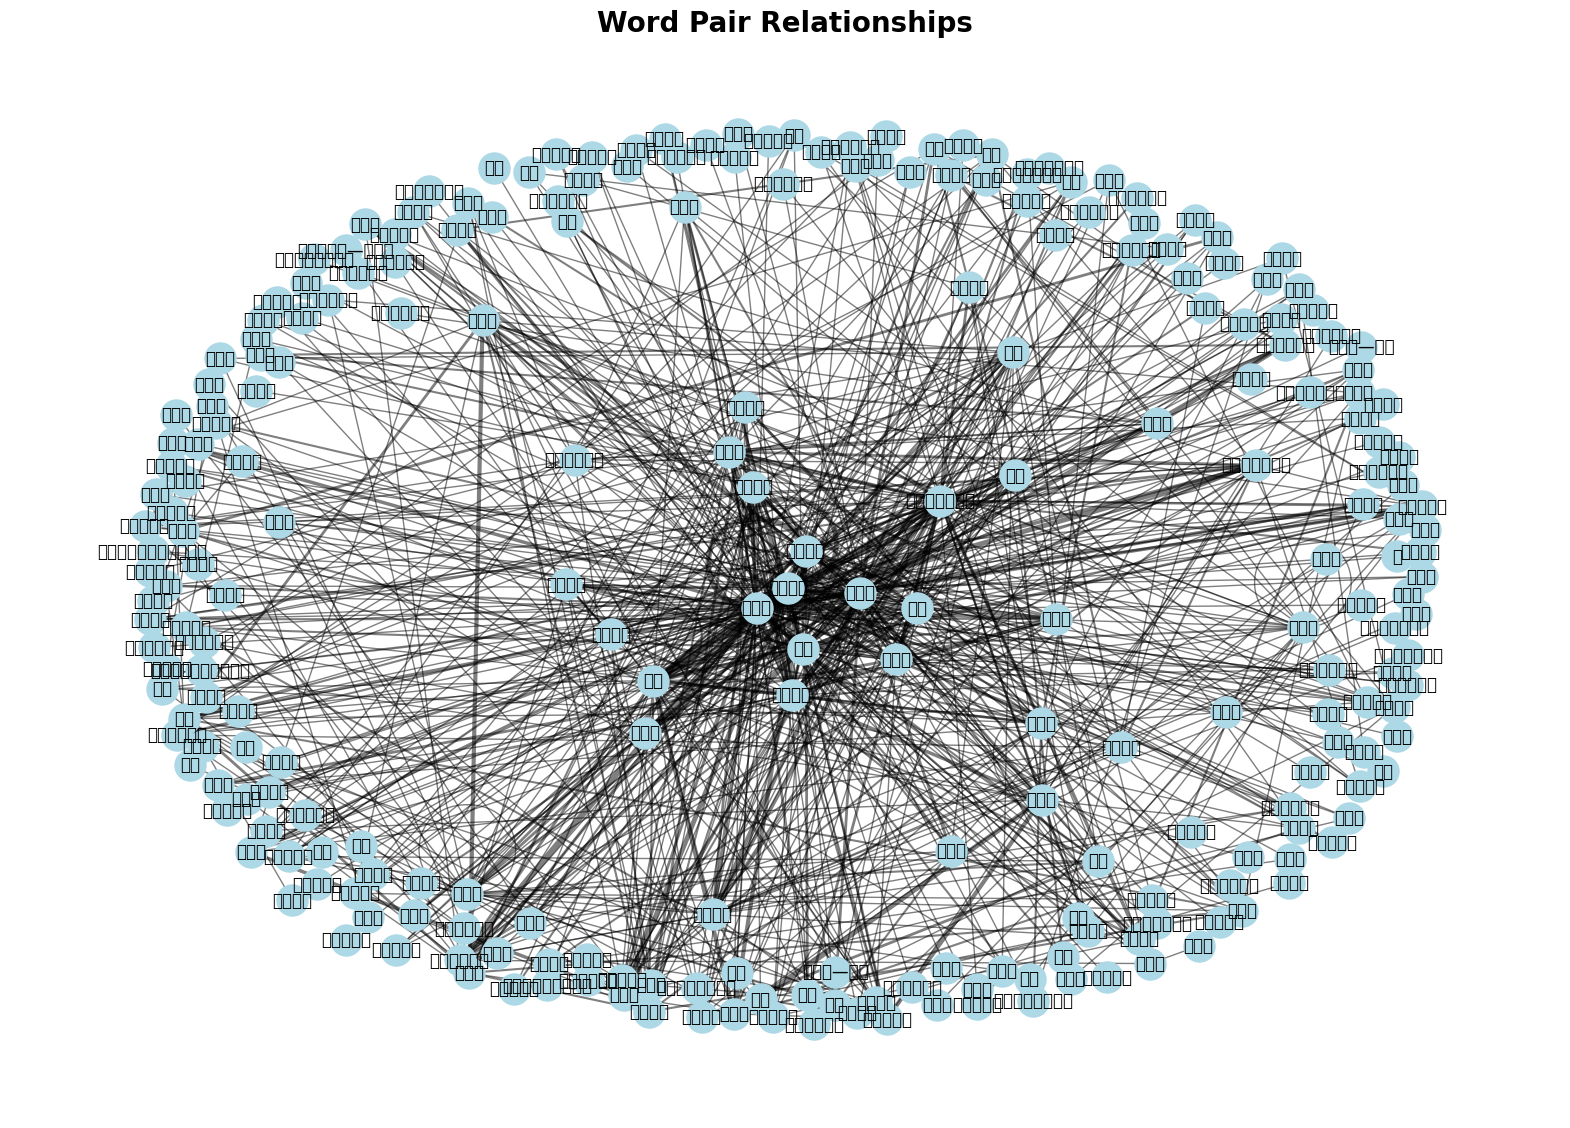

In [16]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict
from itertools import combinations

# Function to check frequency of word pairs from cleaned sentences
def check_pair_frequency(cleaned_sentences):
    pair_frequency = defaultdict(int)  # Create a default dictionary to count pairs

    for sentence in cleaned_sentences:
        words = sentence.split()  # Tokenize the cleaned sentence into words
        word_pairs = combinations(words, 2)  # Create pairs using combinations

        # Count each pair's frequency
        for pair in word_pairs:
            pair_frequency[pair] += 1

    return pair_frequency  # Return the pair frequency dictionary

# Function to plot word pairs with Bangla labels
def plot_word_pairs(pair_frequency):
    G = nx.Graph()  # Create a new graph

    for pair, frequency in pair_frequency.items():
        if frequency > 1:  # Only consider pairs with frequency greater than 1
            G.add_edge(pair[0], pair[1], weight=frequency)  # Add edge with weight

    # Generate positions for the nodes using a layout that separates them more
    pos = nx.spring_layout(G, k=2)  # Increase 'k' for more spacing

    weights = nx.get_edge_attributes(G, 'weight').values()  # Get edge weights

    plt.figure(figsize=(20, 14))

    # Draw nodes
    nx.draw_networkx_nodes(G, pos, node_size=500, node_color='lightblue')

    # Draw edges with thickness based on weight
    nx.draw_networkx_edges(G, pos, width=[w / 2 for w in weights], alpha=0.5)

    # Use a Bangla-compatible font for labels
    plt.rcParams['font.family'] = 'Noto Sans Bengali'  # Set a Bangla font
    nx.draw_networkx_labels(G, pos, font_size=12)

    plt.title('Word Pair Relationships', fontdict={'fontsize': 20, 'fontweight': 'bold'})
    plt.axis('off')  # Turn off the axis
    plt.show()  # Display the graph

# Get the frequency of pairs
pair_frequency = check_pair_frequency(cleaned_sentences)

# Plot the word pairs with Bangla labels
plot_word_pairs(pair_frequency)


In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

vectorizer = TfidfVectorizer()

# Fit and transform the cleaned sentences
tfidf_matrix = vectorizer.fit_transform(cleaned_sentences)

# Create a DataFrame to view the results
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Save TF-IDF values to 'tfidf_each_word.txt'
with open('tfidf_each_word_AI.txt', 'w', encoding='utf-8') as file:
    for word, tfidf_value in zip(vectorizer.get_feature_names_out(), tfidf_matrix.toarray().sum(axis=0)):
        file.write(f'{word}: {tfidf_value}\n')

# Display the TF-IDF DataFrame
print(tfidf_df)


      অক   অত   অদ   অধ        অন   অব  অবশ   অভ   অর   অস  ...       হওয়  \
0    0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  ...  0.000000   
1    0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  ...  0.000000   
2    0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  ...  0.000000   
3    0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  ...  0.335525   
4    0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  ...  0.000000   
..   ...  ...  ...  ...       ...  ...  ...  ...  ...  ...  ...       ...   
160  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  ...  0.000000   
161  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  ...  0.308817   
162  0.0  0.0  0.0  0.0  0.441473  0.0  0.0  0.0  0.0  0.0  ...  0.000000   
163  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  ...  0.000000   
164  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  ...  0.000000   

      হচ   হঠ   হত   হব   হল   হস   হয়   য়গ   য়ম  
0    0.0  0.0  0.0  0.0 

# PER WORD TFIDF COUNT. WORDS ARE NODES AND THE WORDS THAT HAVE SAME TFIDF HAVE EDGE BETWEEN THEM


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2437 (\N{BENGALI LETTER A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Matplotlib currently does not support Bengali natively.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2470 (\N{BENGALI LETTER DA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2472 (\N{BENGALI LETTER NA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2476 (\N{BENGALI LETTER BA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtool

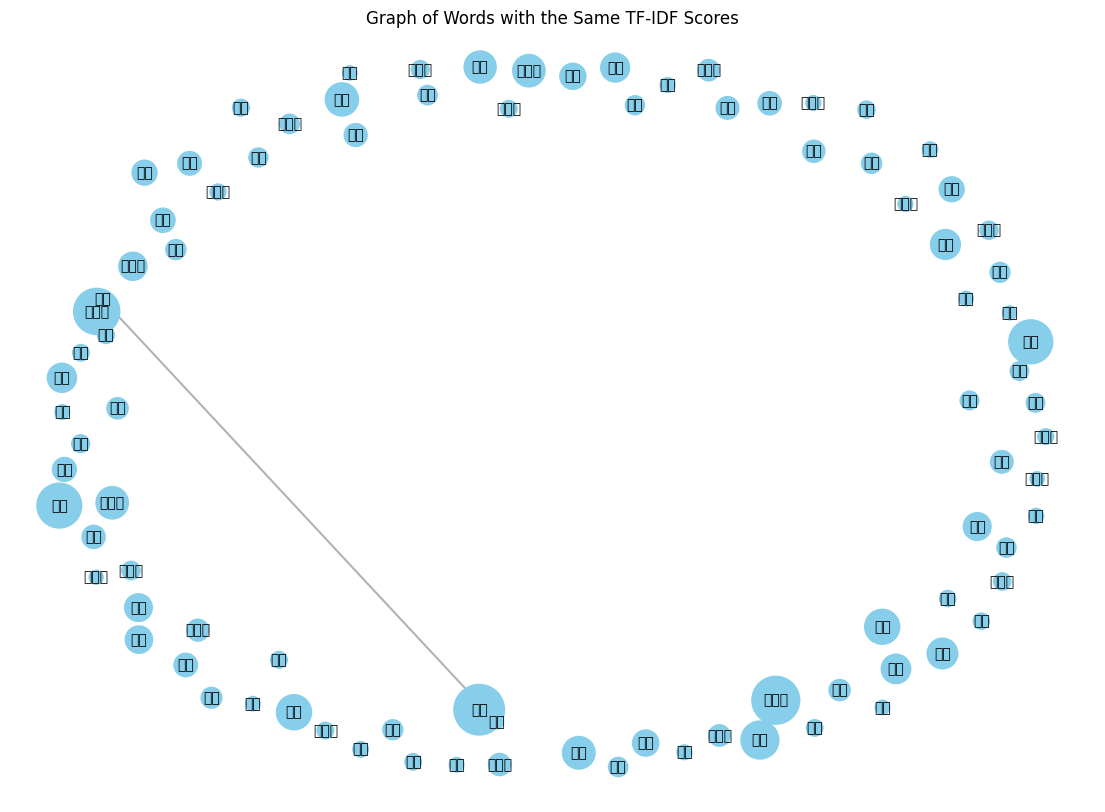

In [18]:
import networkx as nx
import matplotlib.pyplot as plt

def plot_words_graph_with_same_tfidf(tfidf_df, threshold=1):
    # Sum the TF-IDF values for each word across all sentences
    word_tfidf_sum = tfidf_df.sum(axis=0)

    # Filter words that have a TF-IDF score greater than or equal to the threshold
    high_tfidf_words = word_tfidf_sum[word_tfidf_sum >= threshold]

    # Group words by TF-IDF scores
    tfidf_to_words = {}
    for word, score in high_tfidf_words.items():
        if score not in tfidf_to_words:
            tfidf_to_words[score] = []
        tfidf_to_words[score].append(word)

    # Initialize the graph
    G = nx.Graph()

    # Add nodes and edges based on TF-IDF score grouping
    for score, words in tfidf_to_words.items():
        # Add each word as a node
        for word in words:
            G.add_node(word, size=score * 100)  # Size can be proportional to the score for visualization

        # Create edges between words with the same TF-IDF score
        if len(words) > 1:
            for i in range(len(words)):
                for j in range(i + 1, len(words)):
                    G.add_edge(words[i], words[j], weight=score)

    # Generate positions for the nodes using a layout
    pos = nx.spring_layout(G, k=1)  # Adjust 'k' for node spacing

    # Draw nodes, edges, and labels
    plt.figure(figsize=(14, 10))
    nx.draw_networkx_nodes(G, pos, node_size=[G.nodes[node]['size'] for node in G.nodes], node_color='skyblue')
    nx.draw_networkx_edges(G, pos, width=1.5, alpha=0.6, edge_color='gray')
    nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')

    plt.title('Graph of Words with the Same TF-IDF Scores')
    plt.axis('off')
    plt.show()

# Use the function to plot words with TF-IDF >= 1 and edges between words with the same TF-IDF
plot_words_graph_with_same_tfidf(tfidf_df, threshold=1)


In [19]:
import numpy as np

def calculate_word_pair_tfidf(tfidf_df, pair_frequency, filename='word_pair_tfidf_AI.txt'):
    # Create a dictionary to store the TF-IDF scores for each word
    word_tfidf_scores = tfidf_df.sum(axis=0).to_dict()

    # Dictionary to store TF-IDF scores for word pairs
    word_pair_tfidf = {}

    # Calculate TF-IDF for word pairs with frequency greater than 1
    for pair, frequency in pair_frequency.items():
        if frequency > 1:
            word1, word2 = pair
            tfidf1 = word_tfidf_scores.get(word1, 0)
            tfidf2 = word_tfidf_scores.get(word2, 0)

            # Calculate average TF-IDF for the pair
            pair_tfidf = (tfidf1 + tfidf2) / 2
            word_pair_tfidf[pair] = pair_tfidf

    # Write word pairs with TF-IDF scores to a file
    with open(filename, 'w', encoding='utf-8') as file:
        file.write("Word Pair\tFrequency\tTF-IDF\n")
        for pair, tfidf_score in sorted(word_pair_tfidf.items(), key=lambda x: x[1], reverse=True):
            word1, word2 = pair
            freq = pair_frequency[pair]
            file.write(f"{word1} - {word2}\t{freq}\t{tfidf_score:.4f}\n")

    print(f"Word pairs with their TF-IDF scores have been saved to {filename}.")

# Example usage:
# Assuming `tfidf_df` contains the TF-IDF matrix from your previous calculations
# and `pair_frequency` is the result of `check_pair_frequency(cleaned_sentences)`
calculate_word_pair_tfidf(tfidf_df, pair_frequency, filename='word_pair_tfidf_AI.txt')



Word pairs with their TF-IDF scores have been saved to word_pair_tfidf_AI.txt.


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2494 (\N{BENGALI VOWEL SIGN AA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2495 (\N{BENGALI VOWEL SIGN I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2503 (\N{BENGALI VOWEL SIGN E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2496 (\N{BENGALI VOWEL SIGN II}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2509 (\N{BENGALI SIGN VIRAMA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages

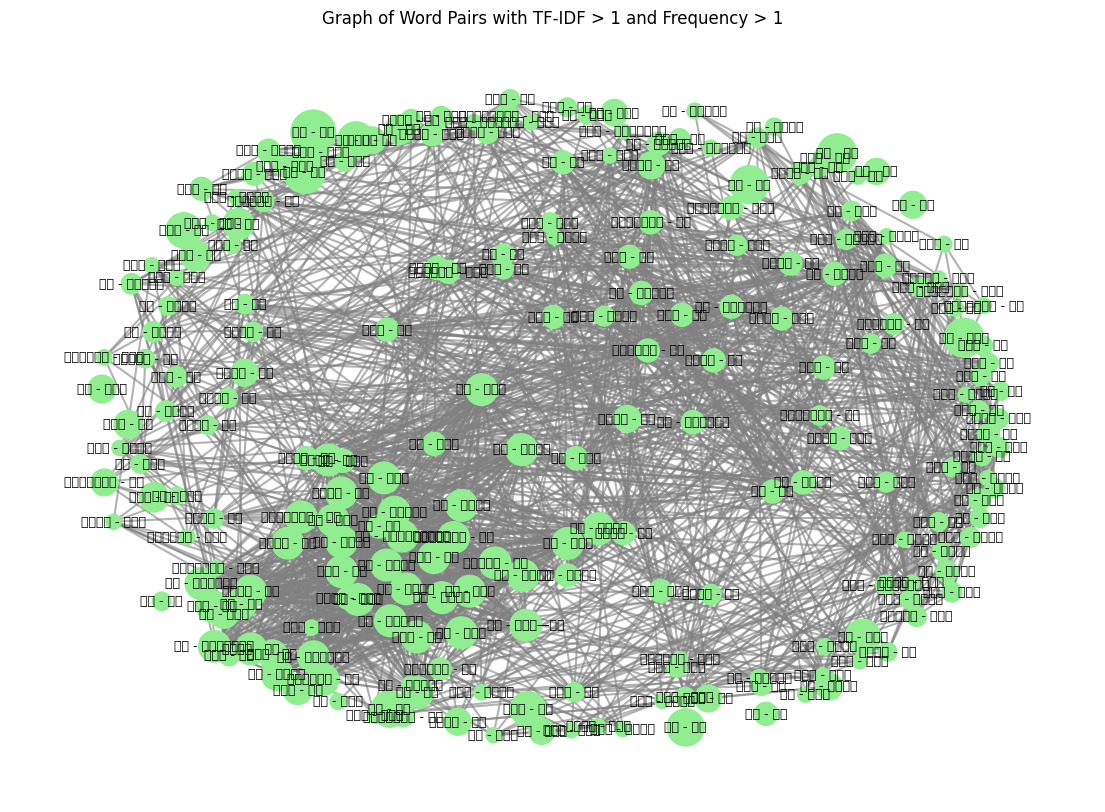

In [20]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict

# Function to plot word pairs as nodes and create edges based on same TF-IDF scores
def plot_word_pair_graph_with_same_tfidf(filename='word_pair_tfidf_AI.txt'):
    # Read the word pair TF-IDF data from the file
    word_pair_tfidf = {}
    try:
        with open(filename, 'r', encoding='utf-8') as file:
            next(file)  # Skip the header
            for line in file:
                parts = line.strip().split('\t')
                if len(parts) == 3:
                    word_pair = parts[0].strip()
                    tfidf_score = float(parts[2].strip())
                    frequency = int(parts[1].strip())  # Assume frequency is in the second column
                    # Store only if frequency > 1 and tfidf_score > 1
                    if frequency > 1 and tfidf_score > 1:
                        word_pair_tfidf[word_pair] = tfidf_score
    except FileNotFoundError:
        print(f"Error: The file '{filename}' was not found.")
        return
    except Exception as e:
        print(f"An error occurred while reading the file: {e}")
        return

    # Group word pairs by their TF-IDF scores
    tfidf_to_word_pairs = defaultdict(list)
    for word_pair, tfidf_score in word_pair_tfidf.items():
        tfidf_to_word_pairs[tfidf_score].append(word_pair)

    # Initialize the graph
    G = nx.Graph()

    # Add nodes and edges based on TF-IDF score grouping
    for tfidf_score, word_pairs in tfidf_to_word_pairs.items():
        # Add each word pair as a node
        for word_pair in word_pairs:
            G.add_node(word_pair, size=tfidf_score * 100)  # Size can be proportional to the TF-IDF score

        # Create edges between word pairs with the same TF-IDF score
        if len(word_pairs) > 1:
            for i in range(len(word_pairs)):
                for j in range(i + 1, len(word_pairs)):
                    G.add_edge(word_pairs[i], word_pairs[j], weight=tfidf_score)

    # Check if the graph is empty
    if len(G.nodes) == 0:
        print("No word pairs with frequency greater than 1 and TF-IDF greater than 1 were found.")
        return

    # Generate positions for the nodes using a layout
    pos = nx.spring_layout(G, k=2)  # Adjust 'k' for node spacing

    # Draw nodes, edges, and labels
    plt.figure(figsize=(14, 10))
    nx.draw_networkx_nodes(G, pos, node_size=[G.nodes[node]['size'] for node in G.nodes], node_color='lightgreen')
    nx.draw_networkx_edges(G, pos, width=1.5, alpha=0.6, edge_color='gray')
    nx.draw_networkx_labels(G, pos, font_size=9, font_family='sans-serif')

    plt.title('Graph of Word Pairs with TF-IDF > 1 and Frequency > 1')
    plt.axis('off')
    plt.show()

# Load and plot the graph
plot_word_pair_graph_with_same_tfidf(filename='word_pair_tfidf_AI.txt')


In [21]:
from gensim.models import Word2Vec

def generate_word2vec(cleaned_sentences, vector_size=100, window=5, min_count=1):
    # Split the cleaned sentences into lists of words
    tokenized_sentences = [sentence.split() for sentence in cleaned_sentences]

    # Initialize and train the Word2Vec model
    model = Word2Vec(sentences=tokenized_sentences, vector_size=vector_size, window=window, min_count=min_count)

    # Retrieve the word vectors (word2vec representation)
    word_vectors = model.wv

    # Save word vectors to a file
    with open('word2vec_ai.txt', 'w') as f:
        for word in word_vectors.index_to_key:
            f.write(f"{word}: {word_vectors[word].tolist()}\n")

    print(f"Word2Vec representations have been saved to word2vec_ai.txt")
    return word_vectors


word_vectors = generate_word2vec(cleaned_sentences)


Word2Vec representations have been saved to word2vec_ai.txt


In [22]:
!pip install gensim matplotlib scikit-learn


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2480 (\N{BENGALI LETTER RA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Matplotlib currently does not support Bengali natively.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2494 (\N{BENGALI VOWEL SIGN AA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2453 (\N{BENGALI LETTER KA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2495 (\N{BENGALI VOWEL SIGN I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/p

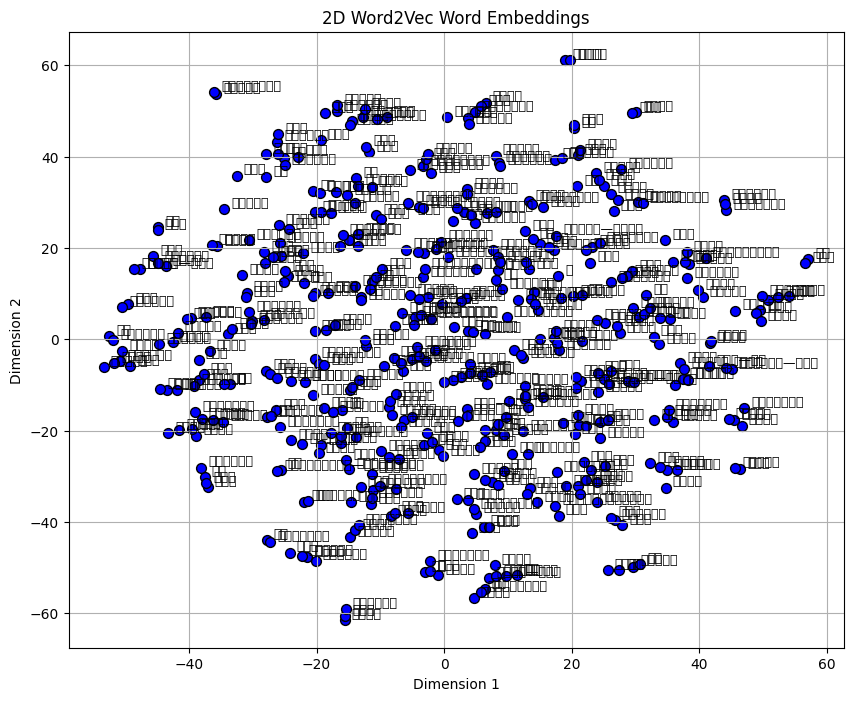

In [23]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from gensim.models import Word2Vec
import numpy as np

def plot_word2vec(cleaned_sentences, vector_size=100, window=5, min_count=1, perplexity=5):
    # Split the cleaned sentences into lists of words
    tokenized_sentences = [sentence.split() for sentence in cleaned_sentences]

    # Train the Word2Vec model
    model = Word2Vec(sentences=tokenized_sentences, vector_size=vector_size, window=window, min_count=min_count)

    # Get the word vectors and corresponding words
    word_vectors = model.wv
    words = word_vectors.index_to_key
    vectors = np.array([word_vectors[word] for word in words])

    # Reduce the dimensionality to 2D using t-SNE with adjusted perplexity
    tsne = TSNE(n_components=2, random_state=42, perplexity=min(perplexity, len(words) - 1))  # Make sure perplexity < n_samples
    vectors_2d = tsne.fit_transform(vectors)

    # Plot the words in the 2D space
    plt.figure(figsize=(10, 8))
    plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1], marker='o', c='blue', edgecolor='k', s=50)

    # Annotate each word at its position
    for i, word in enumerate(words):
        plt.annotate(word, xy=(vectors_2d[i, 0], vectors_2d[i, 1]), xytext=(5, 2), textcoords='offset points', fontsize=9)

    # Display the plot
    plt.title('2D Word2Vec Word Embeddings')
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.grid(True)
    plt.show()


plot_word2vec(cleaned_sentences)


#Plot the words as nodes and the cosine similarity between them as edge



Word2Vec representations have been saved to word2vec_ai.txt


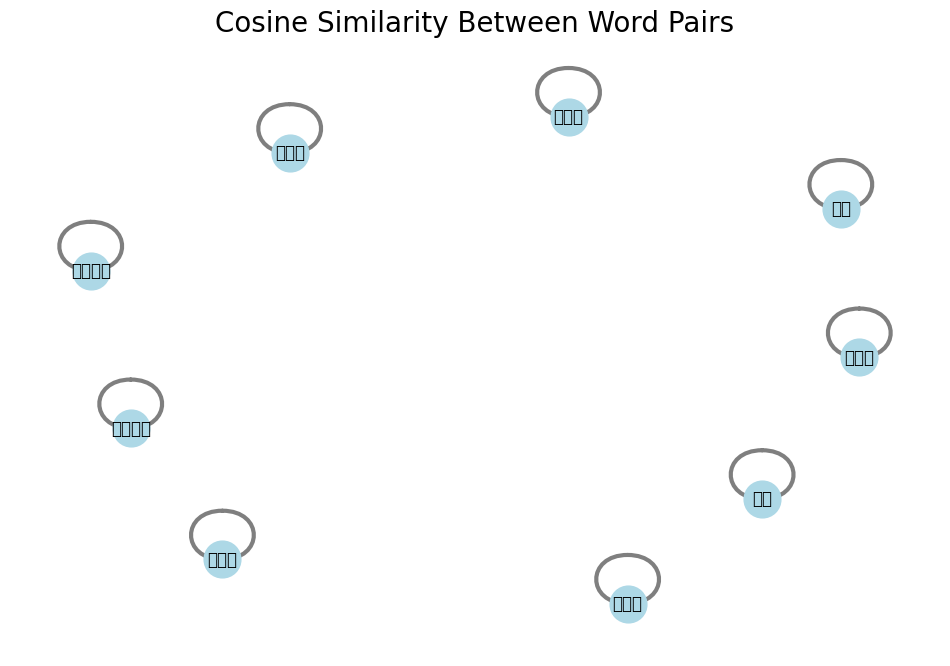

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from collections import defaultdict
from itertools import combinations
from gensim.models import Word2Vec
from scipy.spatial.distance import cosine

# Function to check frequency of word pairs from cleaned sentences
def check_pair_frequency(cleaned_sentences):
    pair_frequency = defaultdict(int)  # Create a default dictionary to count pairs

    for sentence in cleaned_sentences:
        words = sentence.split()  # Tokenize the cleaned sentence into words
        word_pairs = combinations(words, 2)  # Create pairs using combinations

        # Count each pair's frequency
        for pair in word_pairs:
            pair_frequency[pair] += 1

    # Return pairs with frequency > 1
    return {pair: frequency for pair, frequency in pair_frequency.items() if frequency > 1}

def generate_word2vec(cleaned_sentences, vector_size=100, window=5, min_count=1):
    # Split the cleaned sentences into lists of words
    tokenized_sentences = [sentence.split() for sentence in cleaned_sentences]

    # Initialize and train the Word2Vec model
    model = Word2Vec(sentences=tokenized_sentences, vector_size=vector_size, window=window, min_count=min_count)

    # Retrieve the word vectors (word2vec representation)
    word_vectors = model.wv

    # Save word vectors to a file
    with open('word2vec_ai.txt', 'w') as f:
        for word in word_vectors.index_to_key:
            f.write(f"{word}: {word_vectors[word].tolist()}\n")

    print(f"Word2Vec representations have been saved to word2vec_ai.txt")
    return word_vectors

def plot_word_similarity_graph(cleaned_sentences):
    # Get word pair frequencies
    pair_frequency = check_pair_frequency(cleaned_sentences)

    # Generate word vectors
    word_vectors = generate_word2vec(cleaned_sentences)

    # Create a new graph
    G = nx.Graph()

    for pair, frequency in pair_frequency.items():
        word1, word2 = pair

        # Check if both words are in the word vectors
        if word1 in word_vectors and word2 in word_vectors:
            # Calculate cosine similarity
            vector1 = word_vectors[word1]
            vector2 = word_vectors[word2]
            similarity = 1 - cosine(vector1, vector2)

            # Only add edge if similarity is greater than a threshold (e.g., 0.5)
            if similarity > 0.5:
                G.add_edge(word1, word2, weight=similarity)

    # Draw the graph
    plt.figure(figsize=(12, 8))

    pos = nx.spring_layout(G)  # Positions for all nodes

    # Draw nodes
    nx.draw_networkx_nodes(G, pos, node_size=700, node_color='lightblue')

    # Draw edges with thickness based on weight
    edges = G.edges(data=True)
    nx.draw_networkx_edges(G, pos, width=[3 * edge[2]['weight'] for edge in edges], alpha=0.5)

    # Draw labels
    nx.draw_networkx_labels(G, pos, font_size=12)

    plt.title('Cosine Similarity Between Word Pairs', fontsize=20)
    plt.axis('off')  # Turn off the axis
    plt.show()


# Plot the word similarity graph
plot_word_similarity_graph(cleaned_sentences)


Word2Vec representations have been saved to word2vec_ai.txt


<ipython-input-28-6e3618d79446>:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('Set1', len(pair_frequency))  # Use a colormap for different colors


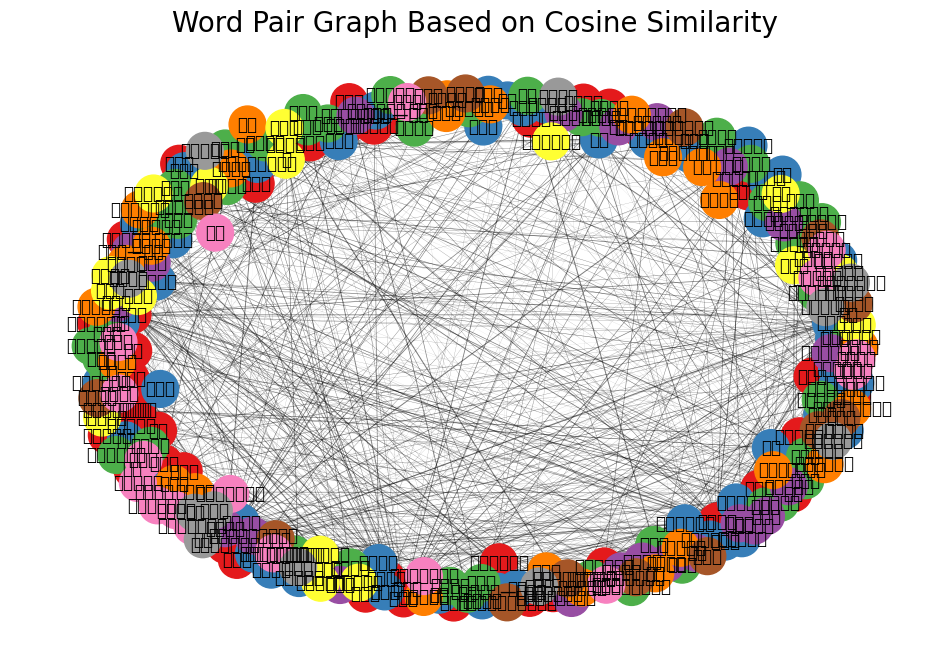

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from collections import defaultdict
from gensim.models import Word2Vec
from scipy.spatial.distance import cosine

def plot_word_pair_graph_with_colors(cleaned_sentences):
    # Get pair frequencies
    pair_frequency = check_pair_frequency(cleaned_sentences)

    # Generate Word2Vec representations
    word_vectors = generate_word2vec(cleaned_sentences)

    G = nx.Graph()  # Create a new graph

    # Define colors for the words
    colors = plt.cm.get_cmap('Set1', len(pair_frequency))  # Use a colormap for different colors
    color_map = {}

    # Open the file to write cosine similarities
    with open('word_cosine_similarity.txt', 'w') as f:
        f.write("Word Pair, Cosine Similarity\n")  # Header for the file

        for idx, (pair, frequency) in enumerate(pair_frequency.items()):
            word1, word2 = pair

            # Only consider pairs with frequency greater than 1
            if frequency > 1:
                if word1 in word_vectors and word2 in word_vectors:
                    vector1 = word_vectors[word1]
                    vector2 = word_vectors[word2]

                    # Calculate cosine similarity
                    similarity = 1 - cosine(vector1, vector2)

                    # Only add edges for cosine similarity greater than 0.5
                    if similarity < 0.5:
                        G.add_edge(word1, word2, weight=similarity)

                        # Write the word pair and similarity to the file
                        f.write(f"({word1}, {word2}), {similarity:.4f}\n")

                        # Assign different colors for each word
                        if word1 not in color_map:
                            color_map[word1] = colors(idx)  # Assign color for word1
                        if word2 not in color_map:
                            color_map[word2] = colors(idx + 1)  # Assign color for word2

    # Set node colors based on the mapping
    node_colors = [color_map[node] for node in G.nodes()]

    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(G, k=2)  # Generate positions for the nodes

    # Draw nodes with assigned colors
    nx.draw_networkx_nodes(G, pos, node_size=700, node_color=node_colors)

    # Draw edges with width based on similarity
    edges = G.edges(data=True)
    nx.draw_networkx_edges(G, pos, width=[3 * edge[2]['weight'] for edge in edges], alpha=0.5)

    # Draw labels
    nx.draw_networkx_labels(G, pos, font_size=12)

    plt.title('Word Pair Graph Based on Cosine Similarity', fontsize=20)
    plt.axis('off')  # Turn off the axis
    plt.show()

# Call the function to plot the graph
plot_word_pair_graph_with_colors(cleaned_sentences)



#Degrees


<ipython-input-29-b4e39b8fe5b1>:28: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('Set1', len(pair_frequency))  # Use a colormap for different colors


Word2Vec representations have been saved to word2vec_ai.txt


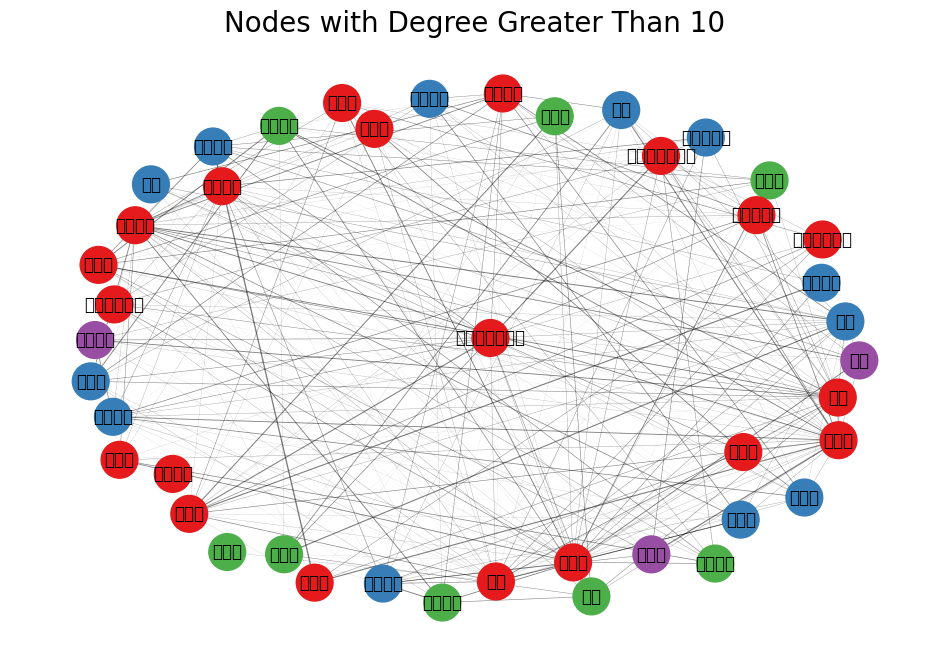

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from collections import defaultdict
from gensim.models import Word2Vec
from scipy.spatial.distance import cosine

# Define the original functions to check pair frequency and generate Word2Vec vectors here
# Example:
# def check_pair_frequency(cleaned_sentences):
#     # implementation for counting word pairs
#     pass
#
# def generate_word2vec(cleaned_sentences):
#     # implementation to generate Word2Vec embeddings
#     pass

def plot_word_pair_graph_with_colors(cleaned_sentences):
    # Get pair frequencies
    pair_frequency = check_pair_frequency(cleaned_sentences)

    # Generate Word2Vec representations
    word_vectors = generate_word2vec(cleaned_sentences)

    G = nx.Graph()  # Create a new graph

    # Define colors for the words
    colors = plt.cm.get_cmap('Set1', len(pair_frequency))  # Use a colormap for different colors
    color_map = {}

    # Open the file to write cosine similarities
    with open('word_cosine_similarity.txt', 'w') as f:
        f.write("Word Pair, Cosine Similarity\n")  # Header for the file

        for idx, (pair, frequency) in enumerate(pair_frequency.items()):
            word1, word2 = pair

            # Only consider pairs with frequency greater than 1
            if frequency > 1:
                if word1 in word_vectors and word2 in word_vectors:
                    vector1 = word_vectors[word1]
                    vector2 = word_vectors[word2]

                    # Calculate cosine similarity
                    similarity = 1 - cosine(vector1, vector2)

                    # Only add edges for cosine similarity greater than 0.5
                    if similarity < 0.5:
                        G.add_edge(word1, word2, weight=similarity)

                        # Write the word pair and similarity to the file
                        f.write(f"({word1}, {word2}), {similarity:.4f}\n")

                        # Assign different colors for each word
                        if word1 not in color_map:
                            color_map[word1] = colors(idx)  # Assign color for word1
                        if word2 not in color_map:
                            color_map[word2] = colors(idx + 1)  # Assign color for word2

    # Now call the function to plot high-degree nodes
    plot_high_degree_nodes(G, color_map, degree_threshold=10)

def plot_high_degree_nodes(G, color_map, degree_threshold=10):
    """
    Plots nodes with a degree greater than a specified threshold.

    Parameters:
        G (networkx.Graph): The graph containing word pairs.
        color_map (dict): A dictionary mapping nodes to colors.
        degree_threshold (int): The minimum degree a node must have to be plotted.
    """
    # Filter nodes by degree
    high_degree_nodes = [node for node, degree in G.degree() if degree > degree_threshold]
    subgraph = G.subgraph(high_degree_nodes)  # Create a subgraph with high-degree nodes

    # Set colors for the nodes
    node_colors = [color_map[node] for node in subgraph.nodes() if node in color_map]

    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(subgraph, k=2)  # Generate positions for the nodes

    # Draw nodes with assigned colors
    nx.draw_networkx_nodes(subgraph, pos, node_size=700, node_color=node_colors)

    # Draw edges with width based on similarity
    edges = subgraph.edges(data=True)
    nx.draw_networkx_edges(subgraph, pos, width=[3 * edge[2]['weight'] for edge in edges], alpha=0.5)

    # Draw labels
    nx.draw_networkx_labels(subgraph, pos, font_size=12)

    plt.title(f'Nodes with Degree Greater Than {degree_threshold}', fontsize=20)
    plt.axis('off')  # Turn off the axis
    plt.show()

# Call the main function to plot only the high-degree nodes
plot_word_pair_graph_with_colors(cleaned_sentences)

Word2Vec representations have been saved to word2vec_ai.txt


<ipython-input-30-55dd9b11cd2d>:28: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('Set1', len(pair_frequency))  # Use a colormap for different colors


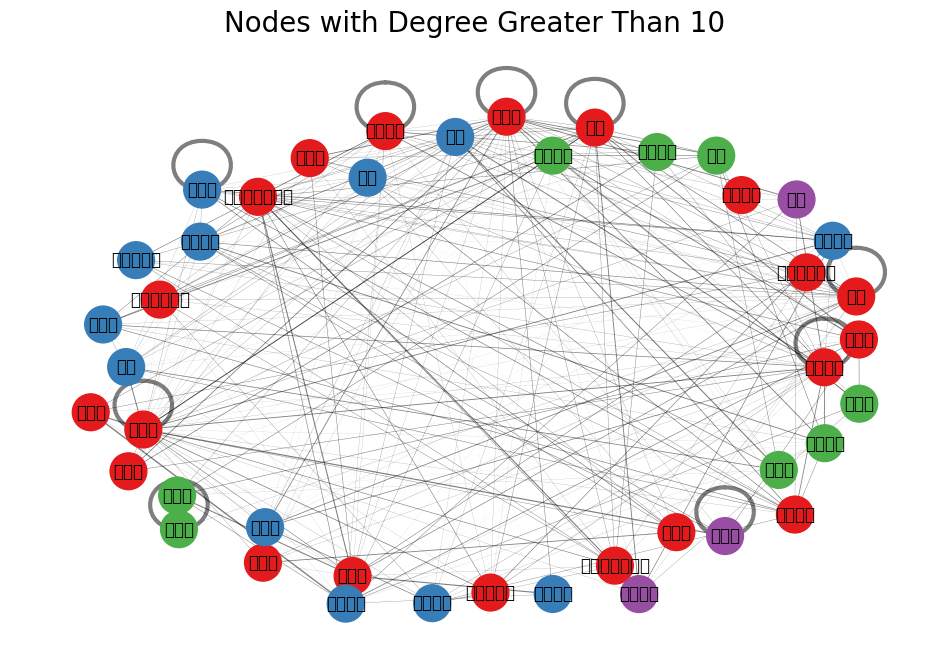

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from collections import defaultdict
from gensim.models import Word2Vec
from scipy.spatial.distance import cosine

# Define the original functions to check pair frequency and generate Word2Vec vectors here
# Example:
# def check_pair_frequency(cleaned_sentences):
#     # implementation for counting word pairs
#     pass
#
# def generate_word2vec(cleaned_sentences):
#     # implementation to generate Word2Vec embeddings
#     pass

def plot_word_pair_graph_with_colors(cleaned_sentences):
    # Get pair frequencies
    pair_frequency = check_pair_frequency(cleaned_sentences)

    # Generate Word2Vec representations
    word_vectors = generate_word2vec(cleaned_sentences)

    G = nx.Graph()  # Create a new graph

    # Define colors for the words
    colors = plt.cm.get_cmap('Set1', len(pair_frequency))  # Use a colormap for different colors
    color_map = {}

    # Open the file to write cosine similarities
    with open('word_cosine_similarity.txt', 'w') as f:
        f.write("Word Pair, Cosine Similarity\n")  # Header for the file

        for idx, (pair, frequency) in enumerate(pair_frequency.items()):
            word1, word2 = pair

            # Only consider pairs with frequency greater than 1
            if frequency > 1:
                if word1 in word_vectors and word2 in word_vectors:
                    vector1 = word_vectors[word1]
                    vector2 = word_vectors[word2]

                    # Calculate cosine similarity
                    similarity = 1 - cosine(vector1, vector2)

                    # Only add edges for cosine similarity greater than 0.5

                    G.add_edge(word1, word2, weight=similarity)

                    # Write the word pair and similarity to the file
                    f.write(f"({word1}, {word2}), {similarity:.4f}\n")

                    # Assign different colors for each word
                    if word1 not in color_map:
                        color_map[word1] = colors(idx)  # Assign color for word1
                    if word2 not in color_map:
                        color_map[word2] = colors(idx + 1)  # Assign color for word2

    # Now call the function to plot high-degree nodes
    plot_high_degree_nodes(G, color_map, degree_threshold=10)

def plot_high_degree_nodes(G, color_map, degree_threshold=10):
    """
    Plots nodes with a degree greater than a specified threshold.

    Parameters:
        G (networkx.Graph): The graph containing word pairs.
        color_map (dict): A dictionary mapping nodes to colors.
        degree_threshold (int): The minimum degree a node must have to be plotted.
    """
    # Filter nodes by degree
    high_degree_nodes = [node for node, degree in G.degree() if degree > degree_threshold]
    subgraph = G.subgraph(high_degree_nodes)  # Create a subgraph with high-degree nodes

    # Set colors for the nodes
    node_colors = [color_map[node] for node in subgraph.nodes() if node in color_map]

    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(subgraph, k=2)  # Generate positions for the nodes

    # Draw nodes with assigned colors
    nx.draw_networkx_nodes(subgraph, pos, node_size=700, node_color=node_colors)

    # Draw edges with width based on similarity
    edges = subgraph.edges(data=True)
    nx.draw_networkx_edges(subgraph, pos, width=[3 * edge[2]['weight'] for edge in edges], alpha=0.5)

    # Draw labels
    nx.draw_networkx_labels(subgraph, pos, font_size=12)

    plt.title(f'Nodes with Degree Greater Than {degree_threshold}', fontsize=20)
    plt.axis('off')  # Turn off the axis
    plt.show()

# Call the main function to plot only the high-degree nodes
plot_word_pair_graph_with_colors(cleaned_sentences)


#Cliques

Word2Vec representations have been saved to word2vec_ai.txt


<ipython-input-31-6e5303f16f16>:28: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('Set1', len(pair_frequency))  # Use a colormap for different colors


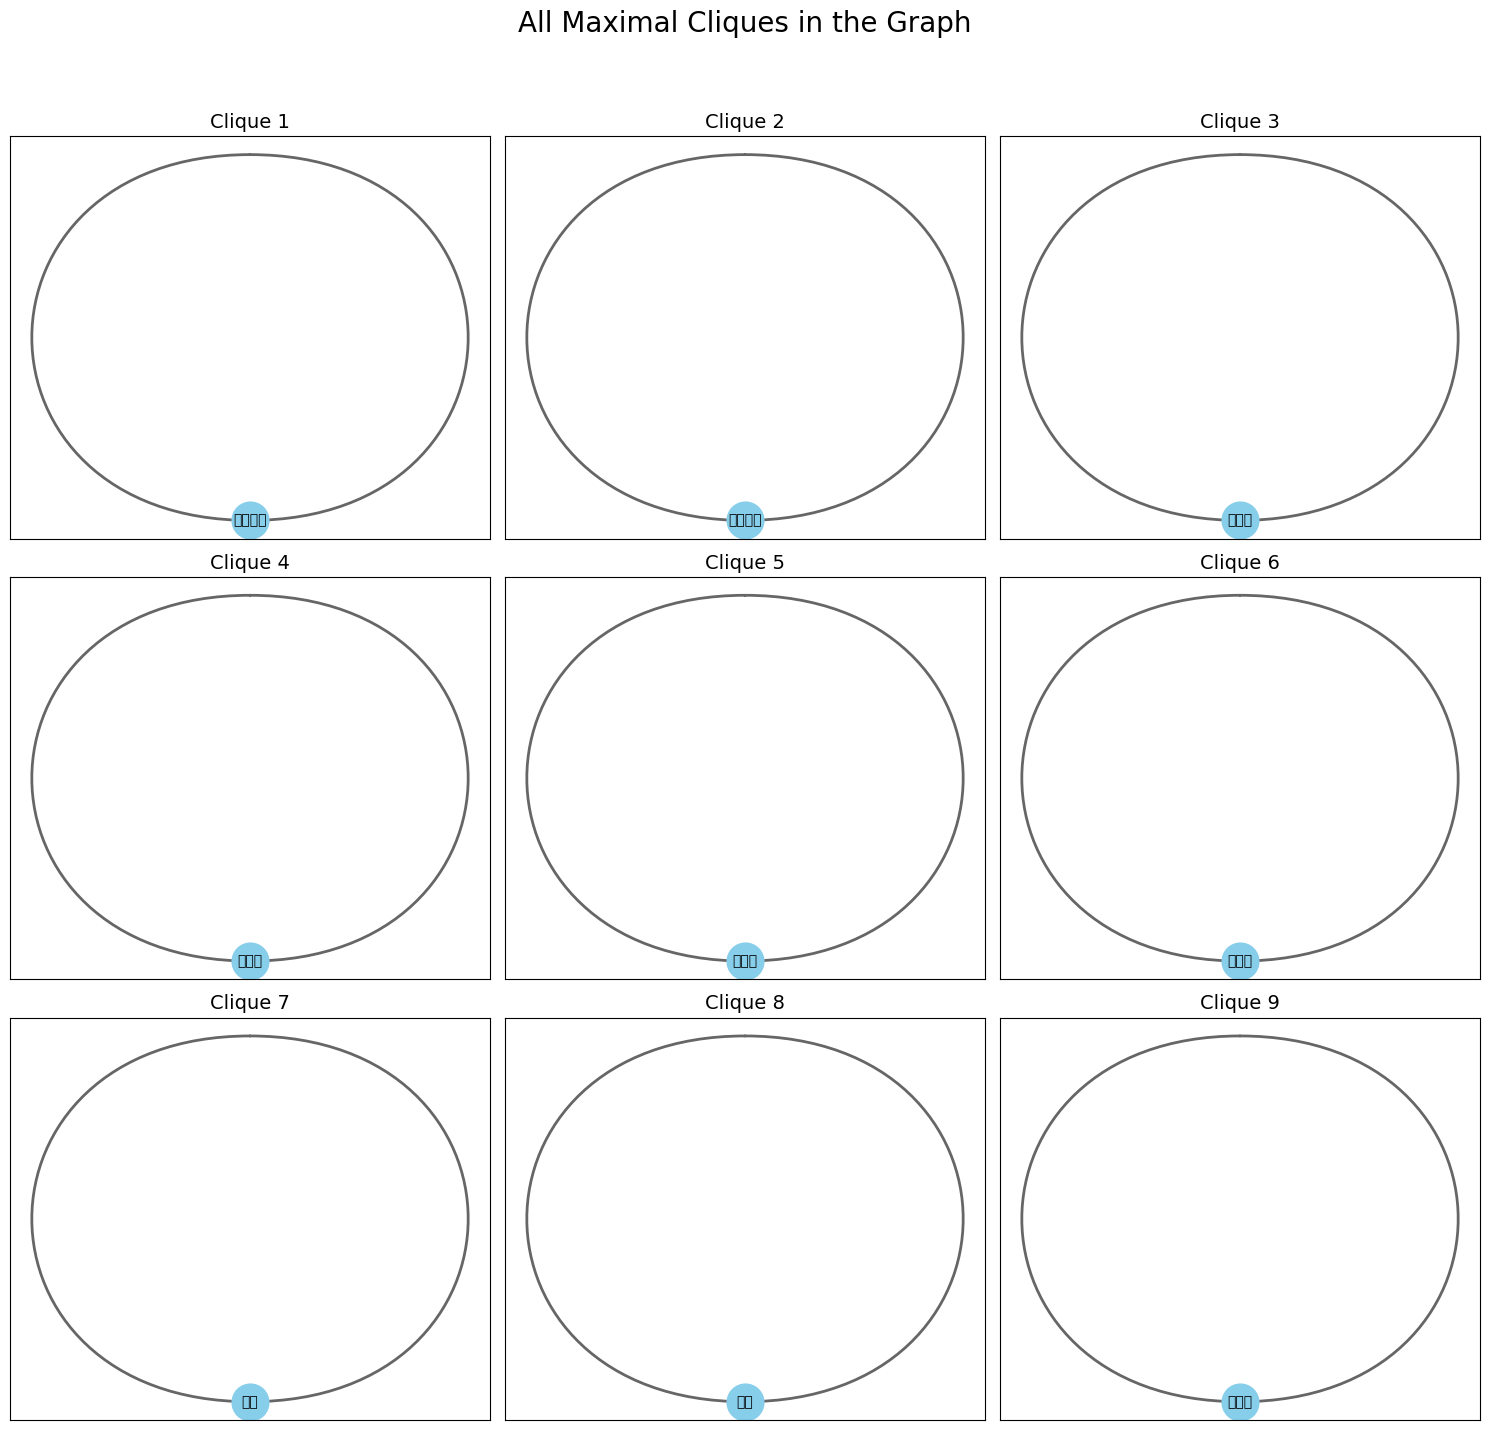

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from collections import defaultdict
from gensim.models import Word2Vec
from scipy.spatial.distance import cosine

# Define the original functions to check pair frequency and generate Word2Vec vectors here
# Example:
# def check_pair_frequency(cleaned_sentences):
#     # implementation for counting word pairs
#     pass
#
# def generate_word2vec(cleaned_sentences):
#     # implementation to generate Word2Vec embeddings
#     pass

def plot_word_pair_graph_with_colors(cleaned_sentences):
    # Get pair frequencies
    pair_frequency = check_pair_frequency(cleaned_sentences)

    # Generate Word2Vec representations
    word_vectors = generate_word2vec(cleaned_sentences)

    G = nx.Graph()  # Create a new graph

    # Define colors for the words
    colors = plt.cm.get_cmap('Set1', len(pair_frequency))  # Use a colormap for different colors
    color_map = {}

    # Open the file to write cosine similarities
    with open('word_cosine_similarity.txt', 'w') as f:
        f.write("Word Pair, Cosine Similarity\n")  # Header for the file

        for idx, (pair, frequency) in enumerate(pair_frequency.items()):
            word1, word2 = pair

            # Only consider pairs with frequency greater than 1
            if frequency > 1:
                if word1 in word_vectors and word2 in word_vectors:
                    vector1 = word_vectors[word1]
                    vector2 = word_vectors[word2]

                    # Calculate cosine similarity
                    similarity = 1 - cosine(vector1, vector2)

                    # Only add edges for cosine similarity greater than 0.5
                    if similarity > 0.5:
                        G.add_edge(word1, word2, weight=similarity)

                        # Write the word pair and similarity to the file
                        f.write(f"({word1}, {word2}), {similarity:.4f}\n")

                        # Assign different colors for each word
                        if word1 not in color_map:
                            color_map[word1] = colors(idx)  # Assign color for word1
                        if word2 not in color_map:
                            color_map[word2] = colors(idx + 1)  # Assign color for word2

    # Plot each clique on a separate subplot
    plot_each_clique_separately(G)

def plot_each_clique_separately(G):
    """
    Plots each maximal clique in the graph on a separate subplot.

    Parameters:
        G (networkx.Graph): The original graph.
    """
    cliques = list(nx.find_cliques(G))  # Find all maximal cliques in the graph
    num_cliques = len(cliques)
    cols = 3  # Number of columns in the subplot grid
    rows = (num_cliques // cols) + (num_cliques % cols > 0)  # Calculate rows needed

    plt.figure(figsize=(5 * cols, 5 * rows))

    for i, clique in enumerate(cliques):
        subgraph = G.subgraph(clique)  # Create a subgraph for the current clique
        pos = nx.spring_layout(subgraph, seed=42)  # Fixed layout for consistency

        # Create a subplot for the current clique
        plt.subplot(rows, cols, i + 1)
        plt.title(f'Clique {i + 1}', fontsize=14)

        # Draw nodes and edges of the current clique
        nx.draw_networkx_nodes(subgraph, pos, node_size=700, node_color='skyblue')
        nx.draw_networkx_edges(subgraph, pos, width=2, alpha=0.6)
        nx.draw_networkx_labels(subgraph, pos, font_size=10)

    plt.suptitle("All Maximal Cliques in the Graph", fontsize=20)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to fit title
    plt.show()

# Call the main function to plot the graph with cliques
plot_word_pair_graph_with_colors(cleaned_sentences)



Word2Vec representations have been saved to word2vec_ai.txt


<ipython-input-32-80f2f472e8cf>:28: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('Set1', len(pair_frequency))  # Use a colormap for different colors


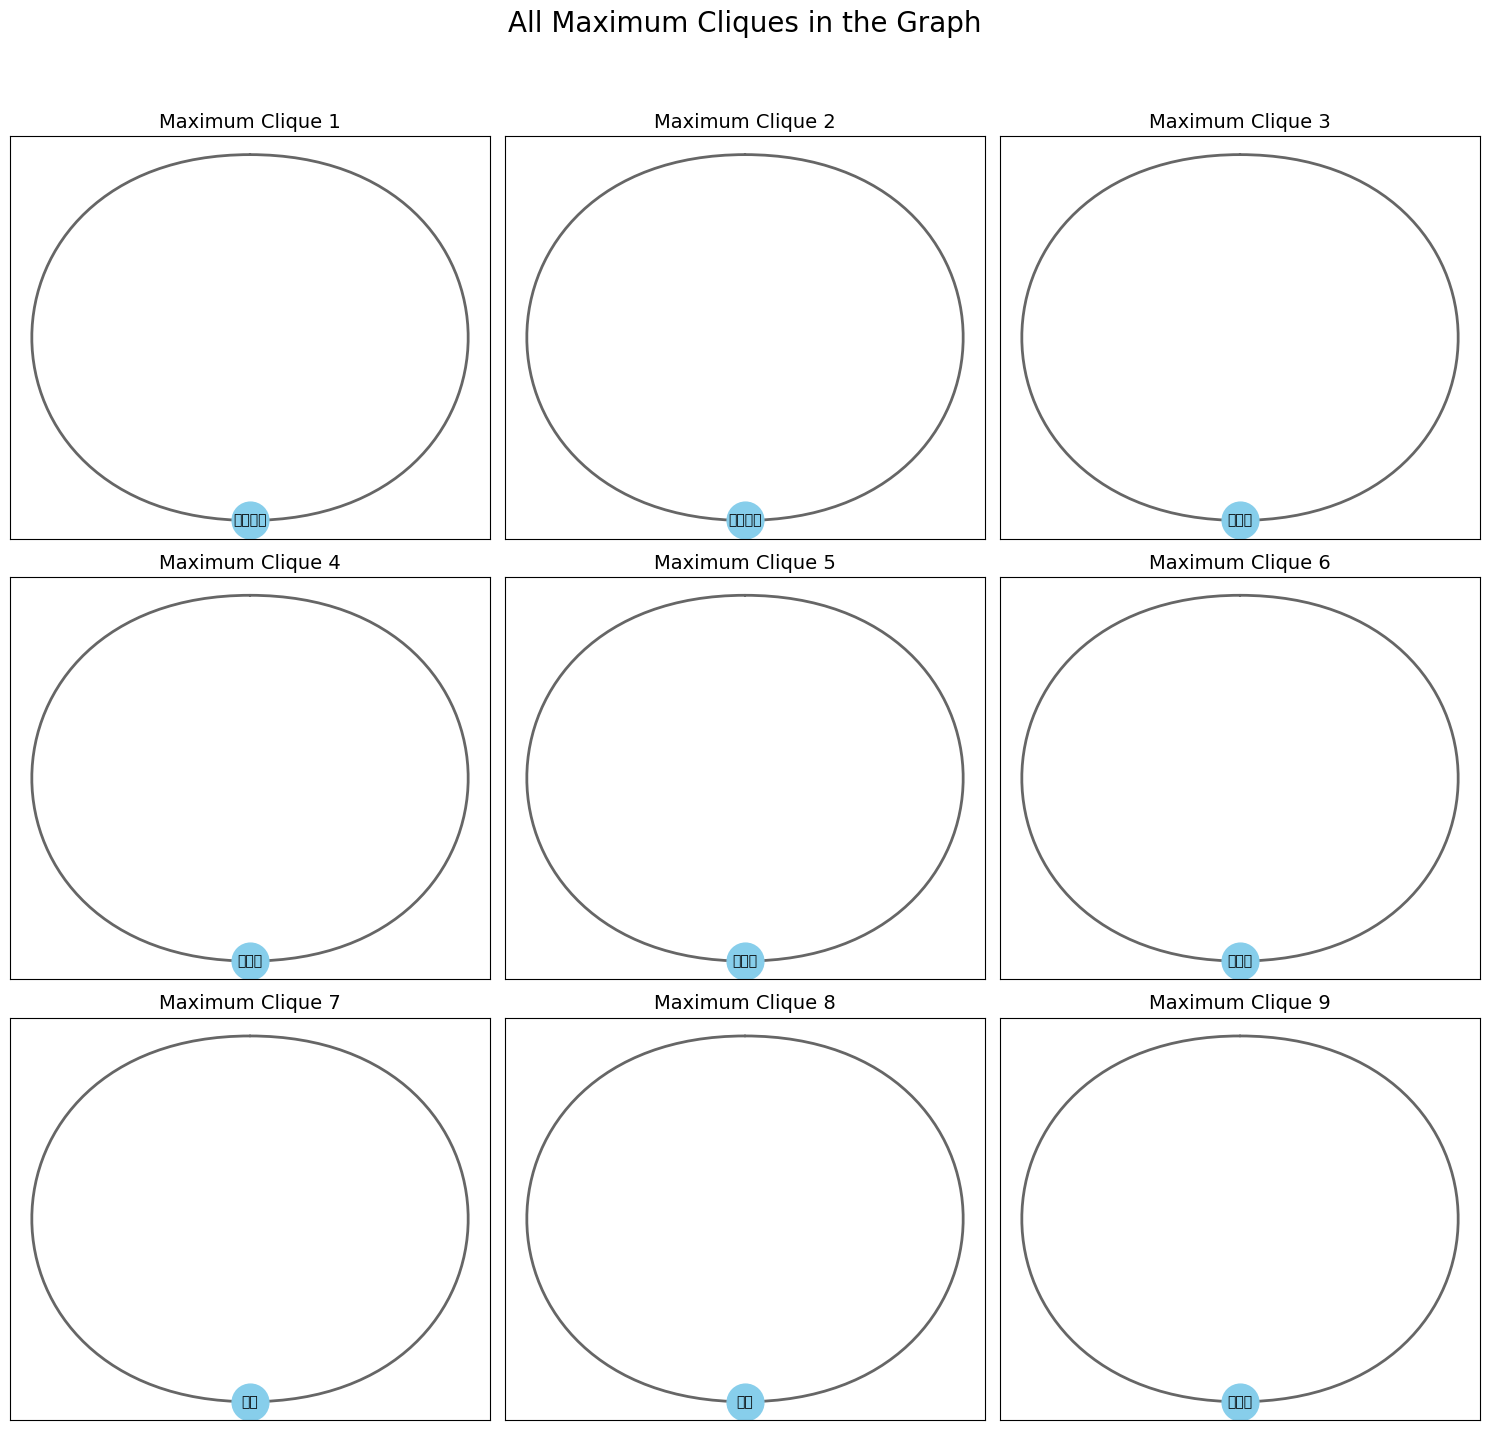

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from collections import defaultdict
from gensim.models import Word2Vec
from scipy.spatial.distance import cosine

# Define the original functions to check pair frequency and generate Word2Vec vectors here
# Example:
# def check_pair_frequency(cleaned_sentences):
#     # implementation for counting word pairs
#     pass
#
# def generate_word2vec(cleaned_sentences):
#     # implementation to generate Word2Vec embeddings
#     pass

def plot_word_pair_graph_with_colors(cleaned_sentences):
    # Get pair frequencies
    pair_frequency = check_pair_frequency(cleaned_sentences)

    # Generate Word2Vec representations
    word_vectors = generate_word2vec(cleaned_sentences)

    G = nx.Graph()  # Create a new graph

    # Define colors for the words
    colors = plt.cm.get_cmap('Set1', len(pair_frequency))  # Use a colormap for different colors
    color_map = {}

    # Open the file to write cosine similarities
    with open('word_cosine_similarity.txt', 'w') as f:
        f.write("Word Pair, Cosine Similarity\n")  # Header for the file

        for idx, (pair, frequency) in enumerate(pair_frequency.items()):
            word1, word2 = pair

            # Only consider pairs with frequency greater than 1
            if frequency > 1:
                if word1 in word_vectors and word2 in word_vectors:
                    vector1 = word_vectors[word1]
                    vector2 = word_vectors[word2]

                    # Calculate cosine similarity
                    similarity = 1 - cosine(vector1, vector2)

                    # Only add edges for cosine similarity greater than 0.5
                    if similarity > 0.5:
                        G.add_edge(word1, word2, weight=similarity)

                        # Write the word pair and similarity to the file
                        f.write(f"({word1}, {word2}), {similarity:.4f}\n")

                        # Assign different colors for each word
                        if word1 not in color_map:
                            color_map[word1] = colors(idx)  # Assign color for word1
                        if word2 not in color_map:
                            color_map[word2] = colors(idx + 1)  # Assign color for word2

    # Plot each maximum clique on a separate subplot
    plot_maximum_cliques(G)

def plot_maximum_cliques(G):
    """
    Plots each maximum clique (largest cliques) in the graph on a separate subplot.

    Parameters:
        G (networkx.Graph): The original graph.
    """
    cliques = list(nx.find_cliques(G))  # Find all maximal cliques in the graph
    max_clique_size = max(len(clique) for clique in cliques)  # Determine the size of the largest clique
    max_cliques = [clique for clique in cliques if len(clique) == max_clique_size]  # Filter only maximum cliques

    num_cliques = len(max_cliques)
    cols = 3  # Number of columns in the subplot grid
    rows = (num_cliques // cols) + (num_cliques % cols > 0)  # Calculate rows needed

    plt.figure(figsize=(5 * cols, 5 * rows))

    for i, clique in enumerate(max_cliques):
        subgraph = G.subgraph(clique)  # Create a subgraph for the current clique
        pos = nx.spring_layout(subgraph, seed=42)  # Fixed layout for consistency

        # Create a subplot for the current clique
        plt.subplot(rows, cols, i + 1)
        plt.title(f'Maximum Clique {i + 1}', fontsize=14)

        # Draw nodes and edges of the current clique
        nx.draw_networkx_nodes(subgraph, pos, node_size=700, node_color='skyblue')
        nx.draw_networkx_edges(subgraph, pos, width=2, alpha=0.6)
        nx.draw_networkx_labels(subgraph, pos, font_size=10)

    plt.suptitle("All Maximum Cliques in the Graph", fontsize=20)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to fit title
    plt.show()

# Call the main function to plot the graph with maximum cliques
plot_word_pair_graph_with_colors(cleaned_sentences)


/usr/local/lib/python3.10/dist-packages/networkx/drawing/nx_pylab.py:457: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  node_collection = ax.scatter(


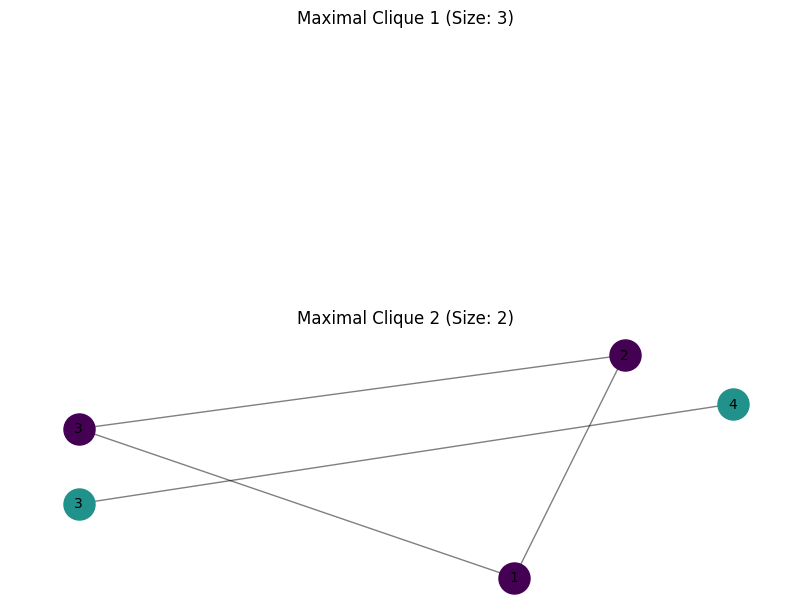

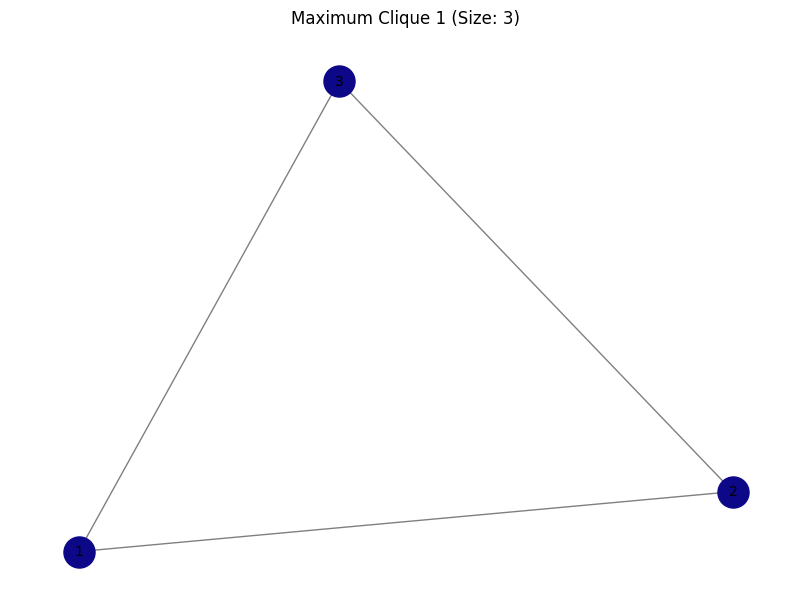

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from collections import defaultdict
from gensim.models import Word2Vec
from scipy.spatial.distance import cosine

# Assume check_pair_frequency and generate_word2vec functions are defined here
# You need to define these functions or import them from another module

def plot_maximal_cliques(G):
    # Find all maximal cliques
    cliques = list(nx.find_cliques(G))

    # Create a figure to plot
    num_cliques = len(cliques)
    fig, axs = plt.subplots(num_cliques, figsize=(8, 6), constrained_layout=True)

    for i, clique in enumerate(cliques):
        subgraph = G.subgraph(clique)

        # Get unique colors for each clique
        color = plt.cm.viridis(i / num_cliques)

        pos = nx.spring_layout(subgraph)  # Layout for the current clique
        nx.draw_networkx_nodes(subgraph, pos, node_color=color, node_size=500)
        nx.draw_networkx_edges(subgraph, pos, alpha=0.5)
        nx.draw_networkx_labels(subgraph, pos, font_size=10)

        # Handling case where axs is a single Axes object
        if num_cliques == 1:
            axs.set_title(f'Maximal Clique {i + 1} (Size: {len(clique)})')
            axs.axis('off')
        else:
            axs[i].set_title(f'Maximal Clique {i + 1} (Size: {len(clique)})')
            axs[i].axis('off')

    plt.show()

def plot_maximum_cliques(G):
    # Find all maximal cliques
    cliques = list(nx.find_cliques(G))

    # Determine the maximum clique size
    max_clique_size = max(len(clique) for clique in cliques)
    max_cliques = [clique for clique in cliques if len(clique) == max_clique_size]

    # Create a figure to plot
    num_max_cliques = len(max_cliques)
    fig, axs = plt.subplots(num_max_cliques, figsize=(8, 6), constrained_layout=True)

    for i, clique in enumerate(max_cliques):
        subgraph = G.subgraph(clique)

        # Get unique colors for each maximum clique
        color = plt.cm.plasma(i / num_max_cliques)

        pos = nx.spring_layout(subgraph)  # Layout for the current maximum clique
        nx.draw_networkx_nodes(subgraph, pos, node_color=color, node_size=500)
        nx.draw_networkx_edges(subgraph, pos, alpha=0.5)
        nx.draw_networkx_labels(subgraph, pos, font_size=10)

        # Handling case where axs is a single Axes object
        if num_max_cliques == 1:
            axs.set_title(f'Maximum Clique {i + 1} (Size: {len(clique)})')
            axs.axis('off')
        else:
            axs[i].set_title(f'Maximum Clique {i + 1} (Size: {len(clique)})')
            axs[i].axis('off')

    plt.show()

# Example usage:
# Create a sample graph (replace with your actual graph creation logic)
G = nx.Graph()  # Create a new graph object and assign it to G
G.add_edges_from([(1, 2), (2, 3), (3, 1), (3, 4)])

# Now call the plotting functions with the defined graph G
plot_maximal_cliques(G)
plot_maximum_cliques(G)

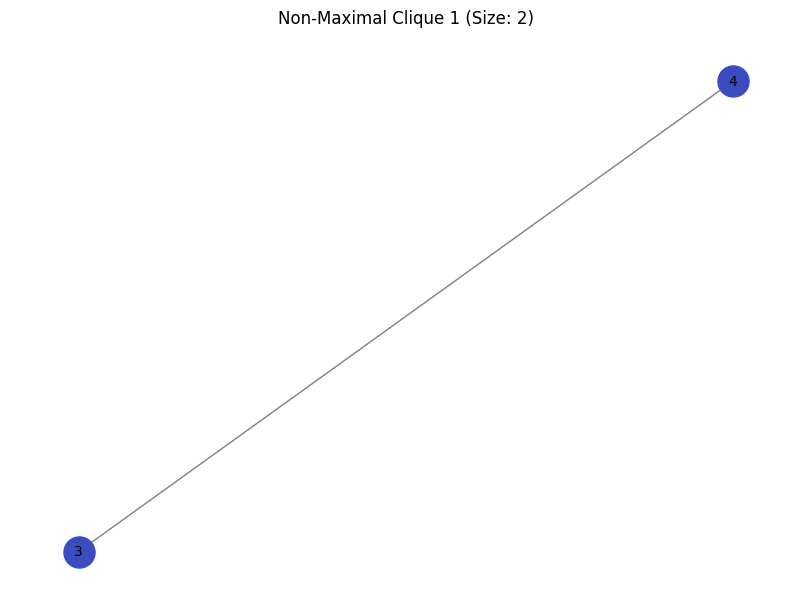

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from collections import defaultdict
from gensim.models import Word2Vec
from scipy.spatial.distance import cosine

# Assume check_pair_frequency and generate_word2vec functions are defined here

def plot_non_maximal_cliques(G):
    # Find all maximal cliques
    all_cliques = list(nx.find_cliques(G))

    # Find maximum clique size
    max_clique_size = max(len(clique) for clique in all_cliques)

    # Get all maximal cliques (those that cannot be extended)
    maximal_cliques = [clique for clique in all_cliques if len(clique) == max_clique_size]

    # Identify non-maximal cliques
    non_maximal_cliques = [clique for clique in all_cliques if clique not in maximal_cliques]

    # Create a figure to plot
    num_non_maximal_cliques = len(non_maximal_cliques)
    if num_non_maximal_cliques == 0:
        print("There are no non-maximal cliques to plot.")
        return

    # Check if there's only one non-maximal clique
    if num_non_maximal_cliques == 1:
        # Create a single subplot
        fig, axs = plt.subplots(figsize=(8, 6), constrained_layout=True)
    else:
        # Create multiple subplots
        fig, axs = plt.subplots(num_non_maximal_cliques, figsize=(8, 6), constrained_layout=True)

    for i, clique in enumerate(non_maximal_cliques):
        subgraph = G.subgraph(clique)

        # Get unique colors for each non-maximal clique
        color = plt.cm.coolwarm(i / num_non_maximal_cliques)

        pos = nx.spring_layout(subgraph)  # Layout for the current non-maximal clique
        nx.draw_networkx_nodes(subgraph, pos, node_color=color, node_size=500)
        nx.draw_networkx_edges(subgraph, pos, alpha=0.5)
        nx.draw_networkx_labels(subgraph, pos, font_size=10)

        # Handle single subplot case
        if num_non_maximal_cliques == 1:
            axs.set_title(f'Non-Maximal Clique {i + 1} (Size: {len(clique)})')
            axs.axis('off')
        else:
            axs[i].set_title(f'Non-Maximal Clique {i + 1} (Size: {len(clique)})')
            axs[i].axis('off')

    plt.show()

# Example usage:
# Assuming G is your graph from earlier code
plot_non_maximal_cliques(G)

#Chromatic Number

Word2Vec representations have been saved to word2vec_ai.txt


<ipython-input-37-636864372565>:28: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('Set1', len(pair_frequency))  # Use a colormap for different colors
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2474 (\N{BENGALI LETTER PA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Matplotlib currently does not support Bengali natively.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2480 (\N{BENGALI LETTER RA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 

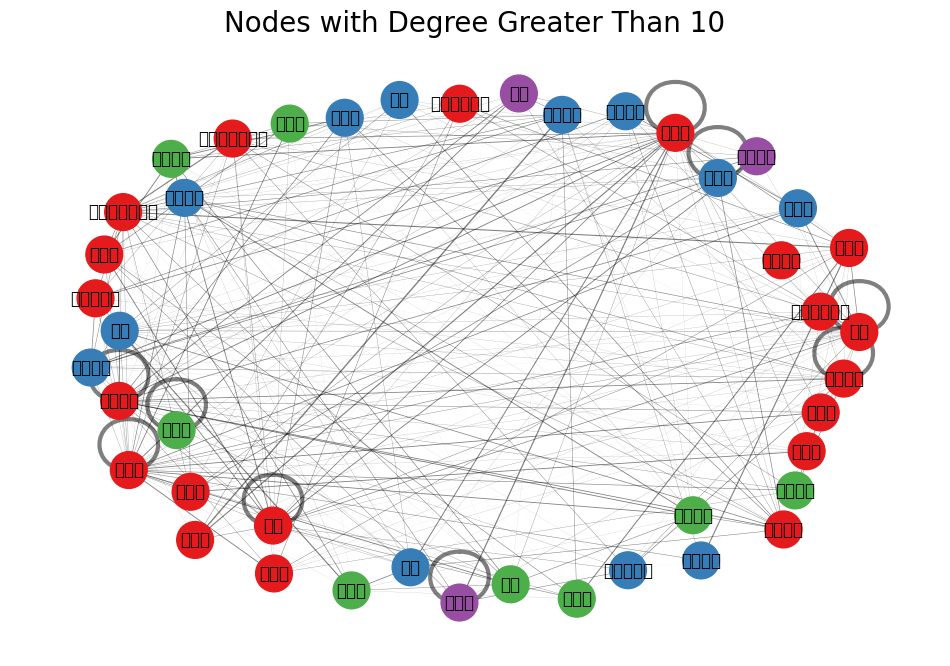

The chromatic number of the graph is: 9


In [37]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from collections import defaultdict
from gensim.models import Word2Vec
from scipy.spatial.distance import cosine

# Define the original functions to check pair frequency and generate Word2Vec vectors here
# Example:
# def check_pair_frequency(cleaned_sentences):
#     # implementation for counting word pairs
#     pass
#
# def generate_word2vec(cleaned_sentences):
#     # implementation to generate Word2Vec embeddings
#     pass

def plot_word_pair_graph_with_colors(cleaned_sentences):
    # Get pair frequencies
    pair_frequency = check_pair_frequency(cleaned_sentences)

    # Generate Word2Vec representations
    word_vectors = generate_word2vec(cleaned_sentences)

    G = nx.Graph()  # Create a new graph

    # Define colors for the words
    colors = plt.cm.get_cmap('Set1', len(pair_frequency))  # Use a colormap for different colors
    color_map = {}

    # Open the file to write cosine similarities
    with open('word_cosine_similarity.txt', 'w') as f:
        f.write("Word Pair, Cosine Similarity\n")  # Header for the file

        for idx, (pair, frequency) in enumerate(pair_frequency.items()):
            word1, word2 = pair

            # Only consider pairs with frequency greater than 1
            if frequency > 1:
                if word1 in word_vectors and word2 in word_vectors:
                    vector1 = word_vectors[word1]
                    vector2 = word_vectors[word2]

                    # Calculate cosine similarity
                    similarity = 1 - cosine(vector1, vector2)

                    # Only add edges for cosine similarity greater than 0.5
                    G.add_edge(word1, word2, weight=similarity)

                    # Write the word pair and similarity to the file
                    f.write(f"({word1}, {word2}), {similarity:.4f}\n")

                    # Assign different colors for each word
                    if word1 not in color_map:
                        color_map[word1] = colors(idx)  # Assign color for word1
                    if word2 not in color_map:
                        color_map[word2] = colors(idx + 1)  # Assign color for word2

    # Now call the function to plot high-degree nodes
    plot_high_degree_nodes(G, color_map, degree_threshold=10)

    # Calculate and print the chromatic number
    chromatic_num = nx.coloring.greedy_color(G, strategy='largest_first')
    num_colors = len(set(chromatic_num.values()))
    print(f"The chromatic number of the graph is: {num_colors}")

def plot_high_degree_nodes(G, color_map, degree_threshold=10):
    """
    Plots nodes with a degree greater than a specified threshold.

    Parameters:
        G (networkx.Graph): The graph containing word pairs.
        color_map (dict): A dictionary mapping nodes to colors.
        degree_threshold (int): The minimum degree a node must have to be plotted.
    """
    # Filter nodes by degree
    high_degree_nodes = [node for node, degree in G.degree() if degree > degree_threshold]
    subgraph = G.subgraph(high_degree_nodes)  # Create a subgraph with high-degree nodes

    # Set colors for the nodes
    node_colors = [color_map[node] for node in subgraph.nodes() if node in color_map]

    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(subgraph, k=2)  # Generate positions for the nodes

    # Draw nodes with assigned colors
    nx.draw_networkx_nodes(subgraph, pos, node_size=700, node_color=node_colors)

    # Draw edges with width based on similarity
    edges = subgraph.edges(data=True)
    nx.draw_networkx_edges(subgraph, pos, width=[3 * edge[2]['weight'] for edge in edges], alpha=0.5)

    # Draw labels
    nx.draw_networkx_labels(subgraph, pos, font_size=12)

    plt.title(f'Nodes with Degree Greater Than {degree_threshold}', fontsize=20)
    plt.axis('off')  # Turn off the axis
    plt.show()

# Call the main function to plot only the high-degree nodes
plot_word_pair_graph_with_colors(cleaned_sentences)

#Make edges between the pair that has same cosine similarity aslo print the word pair in word_to_vec_same_amog _pairs.txt

Word2Vec representations have been saved to word2vec_ai.txt


<ipython-input-26-128e303caf77>:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('Set1', 10)  # Use a colormap with at least 10 different colors


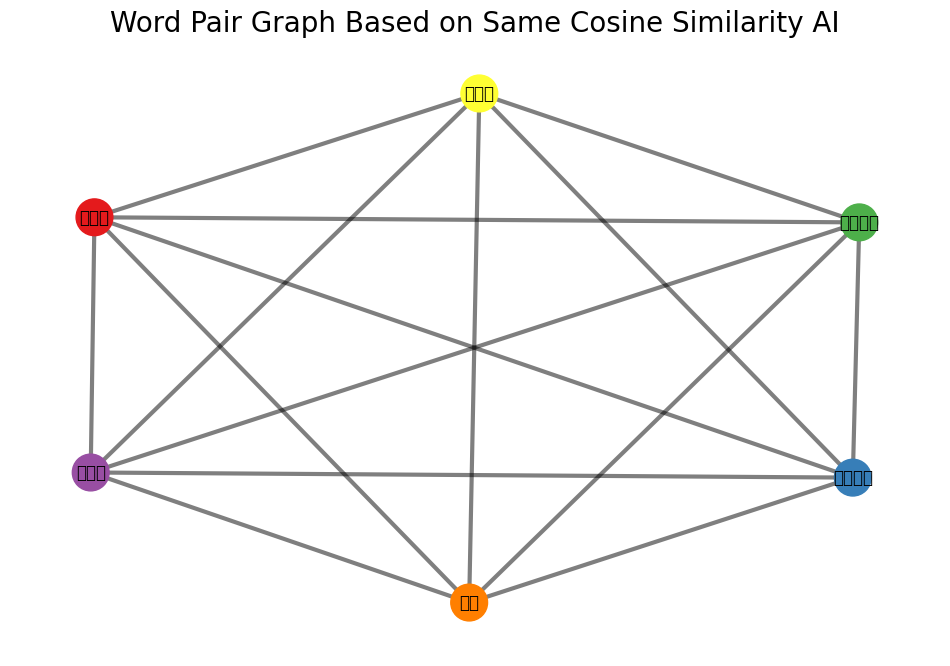

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from collections import defaultdict
from gensim.models import Word2Vec
from scipy.spatial.distance import cosine

def plot_word_pair_graph_with_same_cosine_similarity(cleaned_sentences):
    # Get pair frequencies
    pair_frequency = check_pair_frequency(cleaned_sentences)

    # Generate Word2Vec representations
    word_vectors = generate_word2vec(cleaned_sentences)

    G = nx.Graph()  # Create a new graph
    similarity_dict = defaultdict(list)  # Store pairs with the same cosine similarity

    # Define a colormap
    colors = plt.cm.get_cmap('Set1', 10)  # Use a colormap with at least 10 different colors

    # Unique color mapping for each word
    color_map = {}

    # Add edges based on frequency and cosine similarity
    for pair, frequency in pair_frequency.items():
        word1, word2 = pair

        # Only consider pairs with frequency greater than 1
        if frequency > 1:
            if word1 in word_vectors and word2 in word_vectors:
                vector1 = word_vectors[word1]
                vector2 = word_vectors[word2]

                # Calculate cosine similarity
                similarity = 1 - cosine(vector1, vector2)

                # Only add to similarity_dict for similarities greater than 0.5
                if similarity > 0.5:
                    similarity_dict[similarity].append((word1, word2))

    # Create edges between pairs that have the same cosine similarity
    for sim, pairs in similarity_dict.items():
        if len(pairs) > 1:  # Only consider if there's more than one pair with the same similarity
            for i in range(len(pairs)):
                for j in range(i + 1, len(pairs)):
                    G.add_edge(pairs[i][0], pairs[j][0], weight=sim)  # Connect the first words of the pairs

    # Write the pairs with same cosine similarity to a text file
    with open('word_to_vec_same_among_pairs_AI.txt', 'w') as f:
        for sim, pairs in similarity_dict.items():
            if len(pairs) > 1:  # Only write if there are multiple pairs
                f.write(f"Similarity: {sim:.2f} - Pairs: {', '.join(['(' + p[0] + ', ' + p[1] + ')' for p in pairs])}\n")

    # Set node colors based on the mapping
    for pair in similarity_dict.values():
        for word in pair:
            if word[0] not in color_map:
                color_map[word[0]] = colors(len(color_map) % 10)  # Cycle through colors
            if word[1] not in color_map:
                color_map[word[1]] = colors(len(color_map) % 10)  # Cycle through colors

    node_colors = [color_map[node] for node in G.nodes()]

    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(G, k=2)  # Generate positions for the nodes

    # Draw nodes with assigned colors
    nx.draw_networkx_nodes(G, pos, node_size=700, node_color=node_colors)

    # Draw edges with width based on similarity
    edges = G.edges(data=True)
    nx.draw_networkx_edges(G, pos, width=[3 * edge[2]['weight'] for edge in edges], alpha=0.5)

    # Draw labels
    nx.draw_networkx_labels(G, pos, font_size=12)

    plt.title('Word Pair Graph Based on Same Cosine Similarity AI', fontsize=20)
    plt.axis('off')  # Turn off the axis
    plt.show()

# Call the function to plot the graph
plot_word_pair_graph_with_same_cosine_similarity(cleaned_sentences)


Total number of colors used: 11


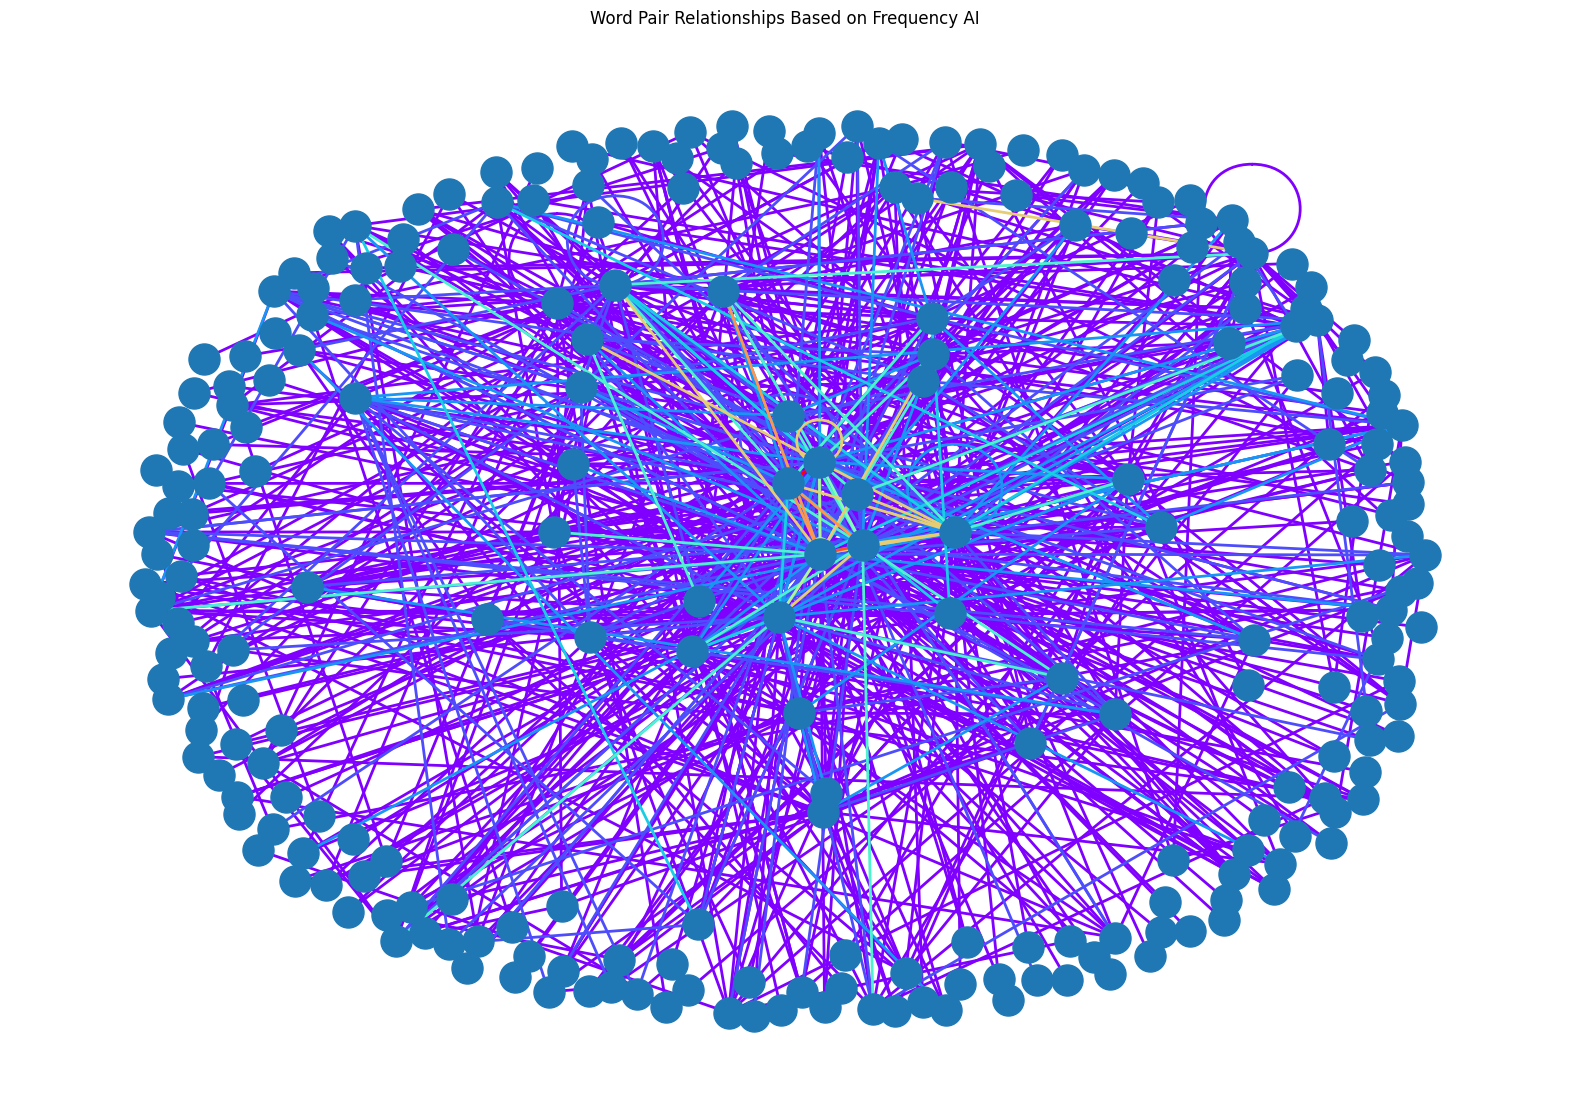

In [27]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict
from itertools import combinations
import matplotlib.cm as cm
import numpy as np

# Function to check frequency of word pairs from cleaned sentences
def check_pair_frequency(cleaned_sentences):
    pair_frequency = defaultdict(int)  # Create a default dictionary to count pairs

    for sentence in cleaned_sentences:
        words = sentence.split()  # Tokenize the cleaned sentence into words
        word_pairs = combinations(words, 2)  # Create pairs using combinations

        # Count each pair's frequency
        for pair in word_pairs:
            pair_frequency[pair] += 1

    return pair_frequency  # Return the pair frequency dictionary

# Function to plot word pairs with colors based on their frequency
def plot_word_pairs_by_frequency(pair_frequency):
    G = nx.Graph()  # Create a new graph

    # Add edges to the graph based on word pairs and their frequencies
    for pair, frequency in pair_frequency.items():
        if frequency > 1:  # Only consider pairs with frequency greater than 1
            G.add_edge(pair[0], pair[1], weight=frequency)

    # Group edges by frequency
    frequency_groups = defaultdict(list)
    for pair, frequency in pair_frequency.items():
        if frequency > 1:
            frequency_groups[frequency].append(pair)

    # Get the number of distinct frequencies
    num_colors = len(frequency_groups)
    print(f"Total number of colors used: {num_colors}")

    # Generate a colormap with distinct colors for each frequency group
    colors = cm.rainbow(np.linspace(0, 1, num_colors))

    # Generate positions for the nodes using a layout
    pos = nx.spring_layout(G, k=2)  # Increase 'k' for more spacing

    plt.figure(figsize=(20, 14))

    # Draw the nodes
    nx.draw_networkx_nodes(G, pos, node_size=500)

    # Assign a unique color to each frequency group
    for idx, (frequency, pairs) in enumerate(frequency_groups.items()):
        edges = [(pair[0], pair[1]) for pair in pairs]
        nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color=[colors[idx]] * len(edges), width=2)

    plt.title('Word Pair Relationships Based on Frequency AI')
    plt.axis('off')  # Turn off the axis
    plt.show()  # Display the graph



pair_frequency = check_pair_frequency(cleaned_sentences)  # Get the frequency of pairs
plot_word_pairs_by_frequency(pair_frequency)  # Plot the word pairs with colors based on frequency
